In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chi2_contingency,ttest_ind
from sklearn.metrics import roc_curve,roc_auc_score,confusion_matrix,classification_report
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import pipeline,make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
import tkinter as tk
from tkinter import ttk
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

### Import and warehouse data: 
- Import all the given datasets
- Explore shape and size. 
- Merge all datasets onto one and explore final shape and size

In [2]:
custdata= pd.read_csv("TelcomCustomer-Churn.csv")


In [3]:
custdata.shape

(7043, 21)

In [4]:
custdata.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4948,3446-QDSZF,Female,0,No,No,4,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,No,Credit card (automatic),55.50,227.35,No
2747,8295-FHIVV,Male,0,No,No,7,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.40,168.65,No
1285,9134-CEQMF,Male,1,Yes,No,7,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.50,676.7,Yes
6372,6368-TZZDT,Male,0,Yes,Yes,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.50,96.85,No
1731,8375-DKEBR,Female,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.6,Yes
901,9734-YWGEX,Female,0,No,No,9,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),98.30,923.5,Yes
6321,1577-HKTFG,Female,0,Yes,No,30,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.65,655.85,Yes
6236,1932-UEDCX,Male,1,Yes,No,33,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),100.60,3270.25,No
2212,8076-FEZKJ,Male,0,No,No,10,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.50,225.85,No
4518,8808-ELEHO,Male,1,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.25,585.95,Yes


## Data Cleaning

In [5]:
custdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Total charges has numerical values but its data type is object.Thus it has some string values


In [6]:
#checking TotalCharges for String Data
custdata.loc[custdata["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
# converting series object dataset into numeric
# errors = 'coerce’ means, if invalid parsing occur then set NaN
custdata["TotalCharges"] = pd.to_numeric(custdata["TotalCharges"], errors = 'coerce')
custdata["TotalCharges"]=custdata["TotalCharges"].fillna(custdata["TotalCharges"].mean())

- NOTE: Although it is ok to have whitespace in our data but we can't have any whitespace if we want to draw a tree. So lets take care of that by replacing whitespace with _

In [8]:
for cols in custdata.select_dtypes(include=["object"]).columns:
    custdata[cols].replace(" ","_",regex=True,inplace=True)
custdata.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2929,2606-PKWJB,Male,0,No,Yes,40,No,No_phone_service,DSL,Yes,...,No,Yes,No,No,One_year,No,Mailed_check,40.25,1564.05,No
1938,7243-LCGGZ,Female,0,No,No,1,Yes,No,No,No_internet_service,...,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Month-to-month,No,Mailed_check,20.90,20.90,No
7013,1685-BQULA,Female,0,No,No,40,Yes,Yes,Fiber_optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Bank_transfer_(automatic),93.40,3756.40,No
2620,7799-DSEWS,Male,0,No,No,18,Yes,No,DSL,Yes,...,Yes,Yes,Yes,No,Month-to-month,Yes,Electronic_check,68.35,1299.80,No
5312,9564-KCLHR,Male,0,No,No,1,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,No,Mailed_check,51.25,51.25,Yes
1436,9546-CQJSU,Female,0,No,No,2,Yes,Yes,Fiber_optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic_check,91.40,193.60,Yes
1756,0134-XWXCE,Female,1,No,No,44,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,One_year,No,Bank_transfer_(automatic),74.85,3268.05,No
2114,7707-PYBBH,Male,0,No,No,40,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed_check,61.90,2647.10,No
395,2977-CEBSX,Female,0,No,No,66,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two_year,Yes,Credit_card_(automatic),90.05,5965.95,No
2017,1087-GRUYI,Male,0,Yes,No,38,Yes,No,No,No_internet_service,...,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Bank_transfer_(automatic),20.40,743.50,No


In [9]:
#checking for missing values
custdata.isna().sum().sort_values()

customerID          0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
TotalCharges        0
OnlineBackup        0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
gender              0
OnlineSecurity      0
Churn               0
dtype: int64

- Total Charges show no missing values but it has some incorrect data

In [10]:
# converting series object dataset into numeric
# errors = 'coerce’ means, if invalid parsing occur then set NaN
custdata["TotalCharges"] = pd.to_numeric(custdata["TotalCharges"], errors = 'coerce')
# filling NaN values with mean
custdata["TotalCharges"]=custdata["TotalCharges"].fillna(custdata["TotalCharges"].mean())


In [11]:
custdata.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


- tenure and monthly charges are fairly symmetrical
- Total charges has positive skew
- as we can see that the different variables present different value ranges, therefore have different magnitute.
- not only the minimum and maximum values are different, but they also spread over ranges of different widths also.
- Thus this data set is a potential candidate for normalization

In [12]:
#dropping Customer Id column
custdata.drop("customerID",axis=1,inplace=True)


In [13]:
#Checking for number of unique values in each categorical column
for col in custdata.columns[custdata.dtypes=="object"].tolist():
    print(custdata[col].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No_phone_service     682
Name: MultipleLines, dtype: int64
Fiber_optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No_internet_service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No_internet_service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No_internet_service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No_internet_service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No_internet_service    1526
Name: StreamingTV

In [14]:
custdata["Churn"].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

- This is unbalanced data


## Univariate Analysis

###  1 General EDA
###  1.1 Target: Churn

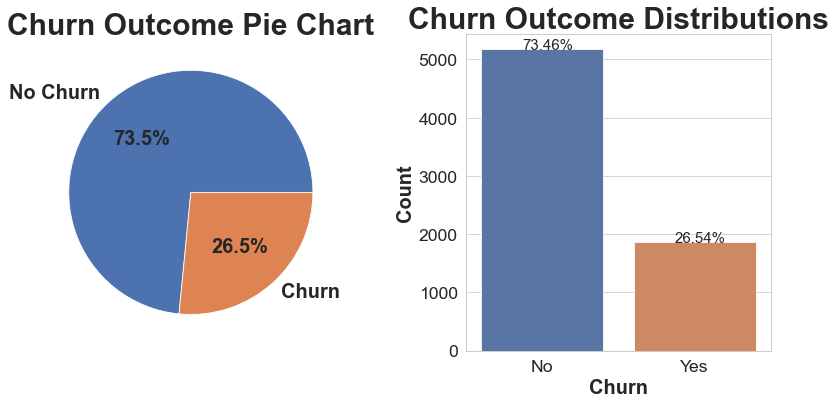

In [17]:
sns.set(style = 'whitegrid')
sns.set_context('paper', font_scale = 2)
fig = plt.figure(figsize = (12,6))
plt.subplot(121)
plt.pie(custdata["Churn"].value_counts(),labels = ['No Churn', 'Churn'], autopct = '%.1f%%', radius = 1, textprops={'fontsize': 20, 'fontweight': 'bold'})
plt.title('Churn Outcome Pie Chart', fontsize = 30, fontweight = 'bold')
plt.subplot(122)
t = sns.countplot(custdata["Churn"])
t.set_xlabel('Churn', fontweight = 'bold', fontsize = 20)
t.set_ylabel('Count', fontweight = 'bold', fontsize = 20)
plt.title('Churn Outcome Distributions', fontsize = 30, fontweight = 'bold')
for p in t.patches:
    txt=str(((p.get_height()/len(custdata["Churn"]))*100).round(2)) + '%'
    txt_x=p.get_x()+p.get_width()/3
    txt_y=p.get_height()
    t.text(txt_x,txt_y,txt,fontsize=15)

plt.tight_layout()


## 2. Numerical Feature EDA
## 2.1 Kernel Density Estimations - Tenure, Monthly Charges, Total Charges



In [18]:
def kdeplot(custdata,feature):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10,6))
    plt.title("KDE plot: {}".format(feature),fontsize=20,fontweight="bold")
    ax=sns.kdeplot(custdata[custdata["Churn"]=="No"][feature],label="No Churn",bw=True,legend=True)
    ax1=sns.kdeplot(custdata[custdata["Churn"]=="Yes"][feature],label="Churn",bw=True,legend=True)
    plt.legend()
    if feature=="tenure":
        plt.xlabel("Tenure length(Months)",fontsize=20,fontweight="bold")
    else:
        plt.xlabel("Charged Amount",fontsize=20,fontweight="bold")

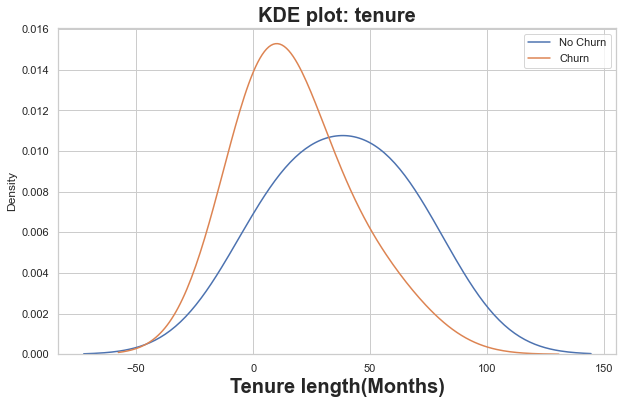

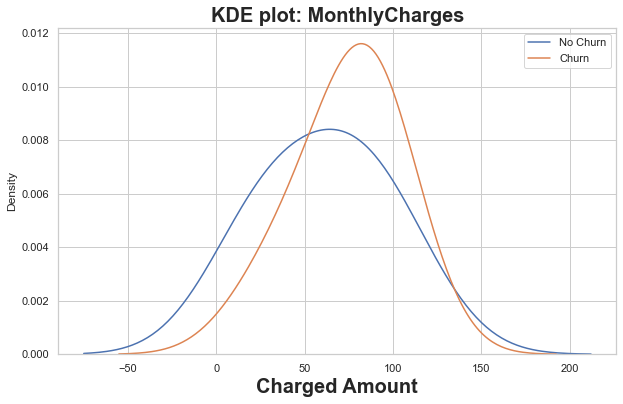

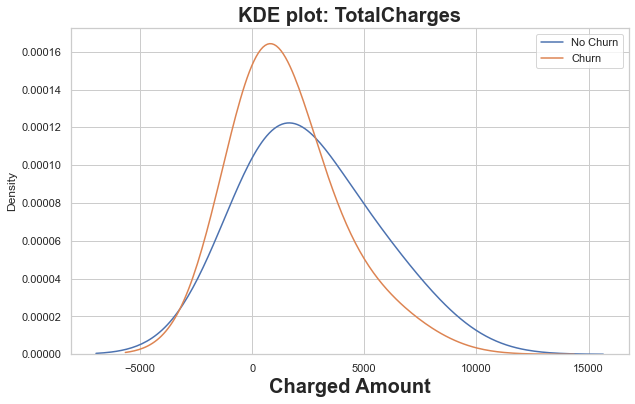

In [19]:
kdeplot(custdata,"tenure")
kdeplot(custdata,"MonthlyCharges")
kdeplot(custdata,"TotalCharges")


- tenure and monthly charges are fairly symmetrical
- Total charges has positive skew
- customers with lower total charges churn more
- new customers are more likely to churn


# 2.2 Grouping Tenure
  Tenure is telling us from how many months the customer is availing the services thus it can have noise too,So we can   group the customers based on their tenure.

In [20]:
# Group the tenure in bins of 12 months
def tenure_groups(custdata):
   
    if custdata["tenure"] <= 12:
       
        return "less_than_a_year"
    elif (custdata["tenure"] > 12) & (custdata["tenure"] <= 24):
       
        return "less_than_2years"
    elif (custdata["tenure"] > 25) & (custdata["tenure"] <= 36):
        
        return "less_than_3years"
    elif (custdata["tenure"] > 37) & (custdata["tenure"] <= 48):
       
        return "less_than_4years"
    elif (custdata["tenure"] > 49) & (custdata["tenure"] <= 60):
        return "less_than_5years"
    else:
       
        return "more_than_5years"
    

In [21]:


custdata["Tenure_groups"]=custdata.apply(lambda df:tenure_groups(df),axis=1)

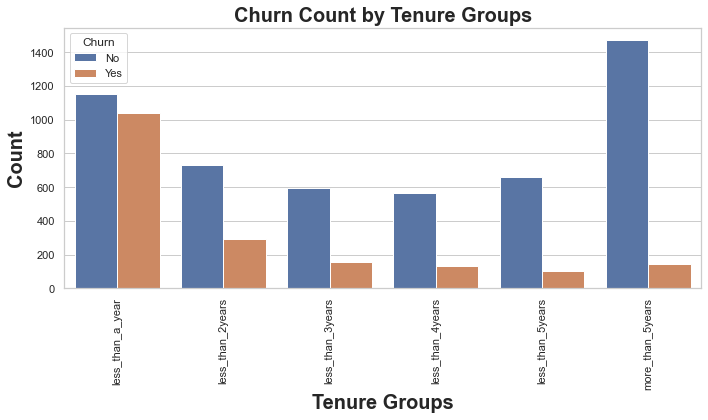

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x="Tenure_groups",data=custdata,hue="Churn",order=["less_than_a_year","less_than_2years","less_than_3years","less_than_4years","less_than_5years","more_than_5years"])
plt.xlabel("Tenure Groups",fontweight="bold",fontsize="20")
plt.ylabel("Count",fontweight="bold",fontsize="20")
plt.xticks(rotation=90)
plt.title("Churn Count by Tenure Groups",fontweight="bold",fontsize="20");
plt.tight_layout()

- There is highest probability of churn for Customers who are using the service for less than 12 months
- It means new clients have higher churning probability than old clients
- Customers using servives for more than 5 year sare most stable clients 

In [23]:
def numerical_estimates(feature):
    plt.figure(figsize=(10,6))
    sns.barplot(x="Tenure_groups",y=feature,data=custdata,hue="Churn",order=["less_than_a_year","less_than_2years","less_than_3years","less_than_4years","less_than_5years","more_than_5years"])
    plt.xlabel("Tenure Groups",fontweight="bold",fontsize="20")
    plt.ylabel("Monthly Charges",fontweight="bold",fontsize="20")
    plt.title("Average {} by Tenure Groups".format(feature),fontweight="bold",fontsize="30");
    plt.tight_layout()
    
    

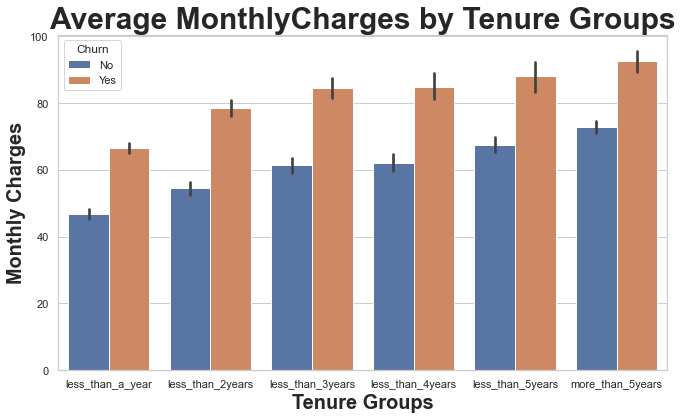

In [24]:
numerical_estimates("MonthlyCharges")

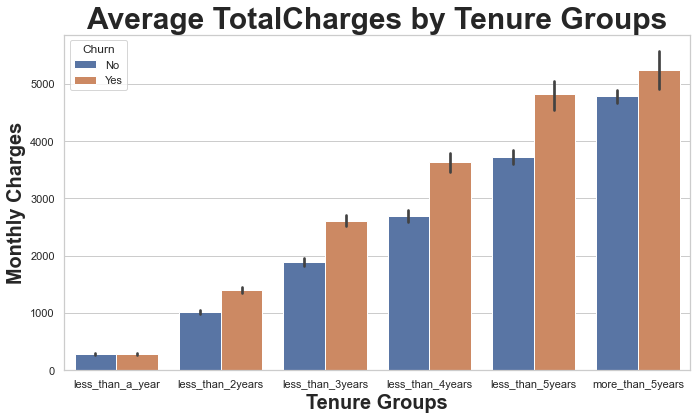

In [25]:
numerical_estimates("TotalCharges")

- The likelihood of customer churning increase with increase in charges
- customers have highest probability of churning when the monthly charges exceeds 60 dollars 
- customers who have churned have paid on an average around 75 dollars  per month
- customers who do not churned most likely have paid around 20$ per month


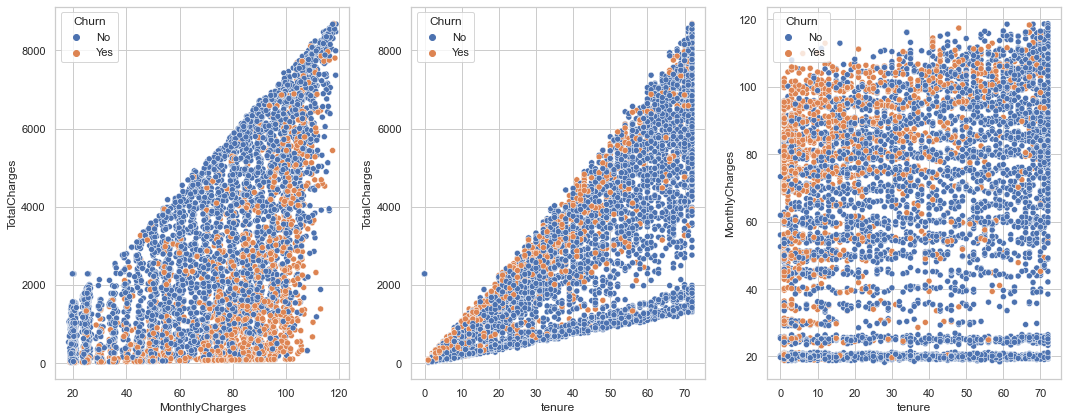

In [26]:
fig,ax=plt.subplots(2,3,figsize=(15,6))
ax1=plt.subplot(1,3,1)
sns.scatterplot(y=custdata["TotalCharges"],x=custdata["MonthlyCharges"],hue=custdata["Churn"])
ax2=plt.subplot(1,3,2)
sns.scatterplot(y=custdata["TotalCharges"],x=custdata["tenure"],hue=custdata["Churn"])
ax3=plt.subplot(1,3,3)
sns.scatterplot(y=custdata["MonthlyCharges"],x=custdata["tenure"],hue=custdata["Churn"])
plt.tight_layout()

- Customer Churning is high when monthly charges are high
- As monthly charges increases the total charges also increases
- 

## 3. Categorical Features
## 3.1 Age Group


In [27]:
crosstabs=[]
gender=pd.crosstab(custdata["gender"],custdata["Churn"])
crosstabs.append(gender)
def plot_gender_group(custdata):
    
    fig,ax=plt.subplots(2,2,figsize=(15,15))
    ax1=plt.subplot(2,2,1)    
    custdata["gender"].value_counts().plot(kind='pie',ax=ax1, labels = ['Female', 'Male'], autopct = '%.1f%%', radius = 1, textprops = {'fontsize':15, 'fontweight':'bold'})
    plt.title("Over all Gender Distribution",fontsize=15, fontweight='bold')  
    
    ax2=plt.subplot(2,2,2)      
    
    gender.div(gender.sum(1).astype(float),axis=0).plot.bar(stacked=True,ax=ax2)  
    ax2.set_xticklabels(labels = ['Female', 'Male'], fontweight = 'bold', fontsize = 12)
    ax2.set_xlabel(" ")
    ax2.set_ylabel(" Proportion",fontsize=15, fontweight='bold')
    ax2.set_title("Chrun by Gender",fontsize=15, fontweight='bold')
    
    ax3=plt.subplot(2,2,3)
    sns.barplot(x="gender",y="MonthlyCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("Monthly Charges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['Female', 'Male'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by gender".format("Monthly Charges"),fontweight="bold",fontsize=20);
    
    ax3=plt.subplot(2,2,4)
    sns.barplot(x="gender",y="TotalCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("TotalCharges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['Female', 'Male'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by gender".format("TotalCharges"),fontweight="bold",fontsize=20);
    plt.tight_layout()
    

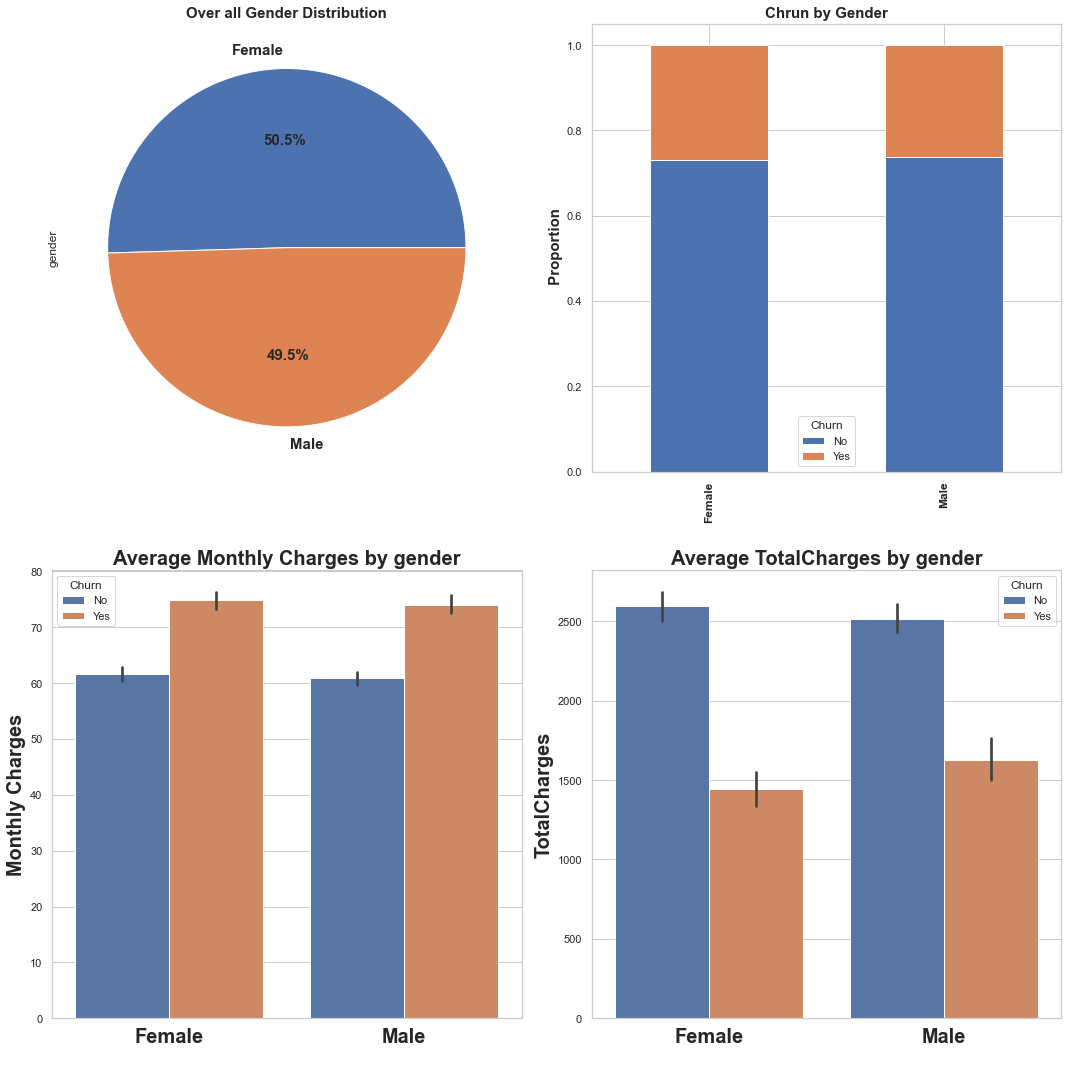

In [28]:
plot_gender_group(custdata)

- Gender has no significant effect on customer Churn
- Both males and Females are paying on an average sam emonthly charges but Male are paying more total charges for the service

In [29]:
SeniorCitizen=pd.crosstab(custdata["SeniorCitizen"],custdata["Churn"])
crosstabs.append(SeniorCitizen)
def plot_age_group(custdata):
    
    fig,ax=plt.subplots(2,2,figsize=(15,15))
    ax1=plt.subplot(2,2,1)    
    custdata["SeniorCitizen"].value_counts().plot(kind='pie',ax=ax1, labels = ['Non-Senior Citizen', 'Senior'], autopct = '%.1f%%', radius = 1, textprops = {'fontsize':15, 'fontweight':'bold'})
    plt.title("Over all Age Distribution",fontsize=15, fontweight='bold')  
    
    ax2=plt.subplot(2,2,2)      
   
    SeniorCitizen.div(SeniorCitizen.sum(1).astype(float),axis=0).plot.bar(stacked=True,ax=ax2)  
    ax2.set_xticklabels(labels = ['Non-Senior Citizen', 'Senior Citizen'], fontweight = 'bold', fontsize = 12)
    ax2.set_xlabel(" ")
    ax2.set_ylabel(" Proportion",fontsize=15, fontweight='bold')
    ax2.set_title("Chrun by Age",fontsize=15, fontweight='bold')
    
    ax3=plt.subplot(2,2,3)
    sns.barplot(x="SeniorCitizen",y="MonthlyCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("Monthly Charges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['Non-Senior Citizen', 'Senior Citizen'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by SeniorCitizen".format("Monthly Charges"),fontweight="bold",fontsize=20);
    
    ax3=plt.subplot(2,2,4)
    sns.barplot(x="SeniorCitizen",y="TotalCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("TotalCharges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['Non-Senior Citizen', 'Senior Citizen'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by SeniorCitizen".format("TotalCharges"),fontweight="bold",fontsize=20);
    plt.tight_layout()
    
    plt.tight_layout()

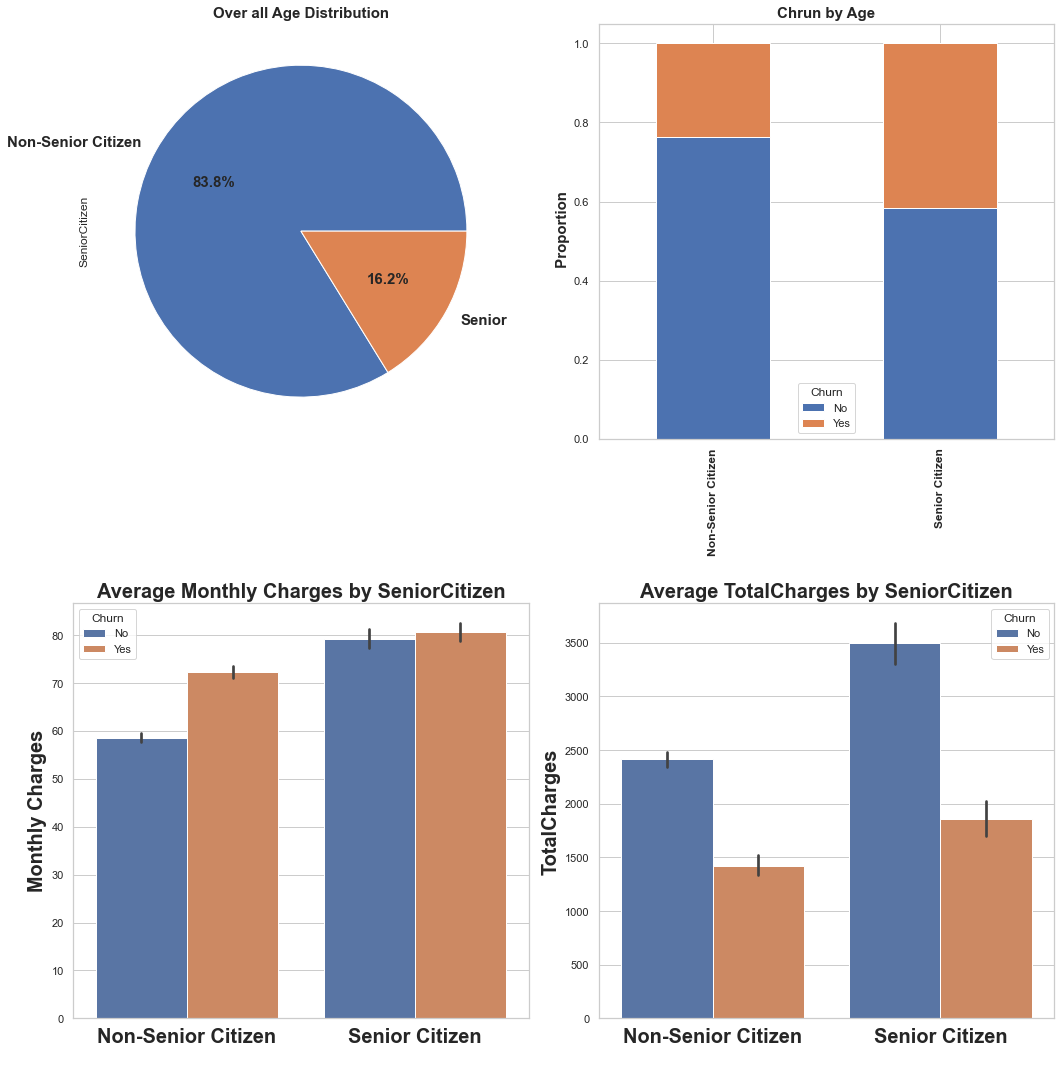

In [30]:
plot_age_group(custdata)

- dataset has significantly less senior citizens than non-seniors (only 16% are senior)
- A higher proportion of senior citizens churn than non-senior citizens
- Senior citizens on an average are paying higher monthly and total charges


In [31]:
Partner=pd.crosstab(custdata["Partner"],custdata["Churn"])
crosstabs.append(Partner)
def plot_partner_group(custdata):
    
    fig,ax=plt.subplots(2,2,figsize=(15,15))
    ax1=plt.subplot(2,2,1)    
    custdata["Partner"].value_counts().plot(kind='pie',ax=ax1, autopct = '%.1f%%', radius = 1, textprops = {'fontsize':15, 'fontweight':'bold'})
    plt.title("Over all Distribution of Partner",fontsize=15, fontweight='bold')  
    
    ax2=plt.subplot(2,2,2)      
   
    Partner.div(Partner.sum(1).astype(float),axis=0).plot.bar(stacked=True,ax=ax2)  
    ax2.set_xlabel(" ")
    ax2.set_ylabel(" Proportion ",fontsize=15, fontweight='bold')
    ax2.set_title("Chrun by Partner",fontsize=15, fontweight='bold')
    ax2.set_xticklabels(labels = ['No', 'Yes'], fontweight = 'bold', fontsize = 15)
    
    ax3=plt.subplot(2,2,3)
    sns.barplot(x="Partner",y="MonthlyCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("Monthly Charges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['No', 'Yes'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by Partner".format("Monthly Charges"),fontweight="bold",fontsize=20);
    
    ax3=plt.subplot(2,2,4)
    sns.barplot(x="Partner",y="TotalCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("TotalCharges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['No', 'Yes'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by Partner".format("TotalCharges"),fontweight="bold",fontsize=20);
    plt.tight_layout()

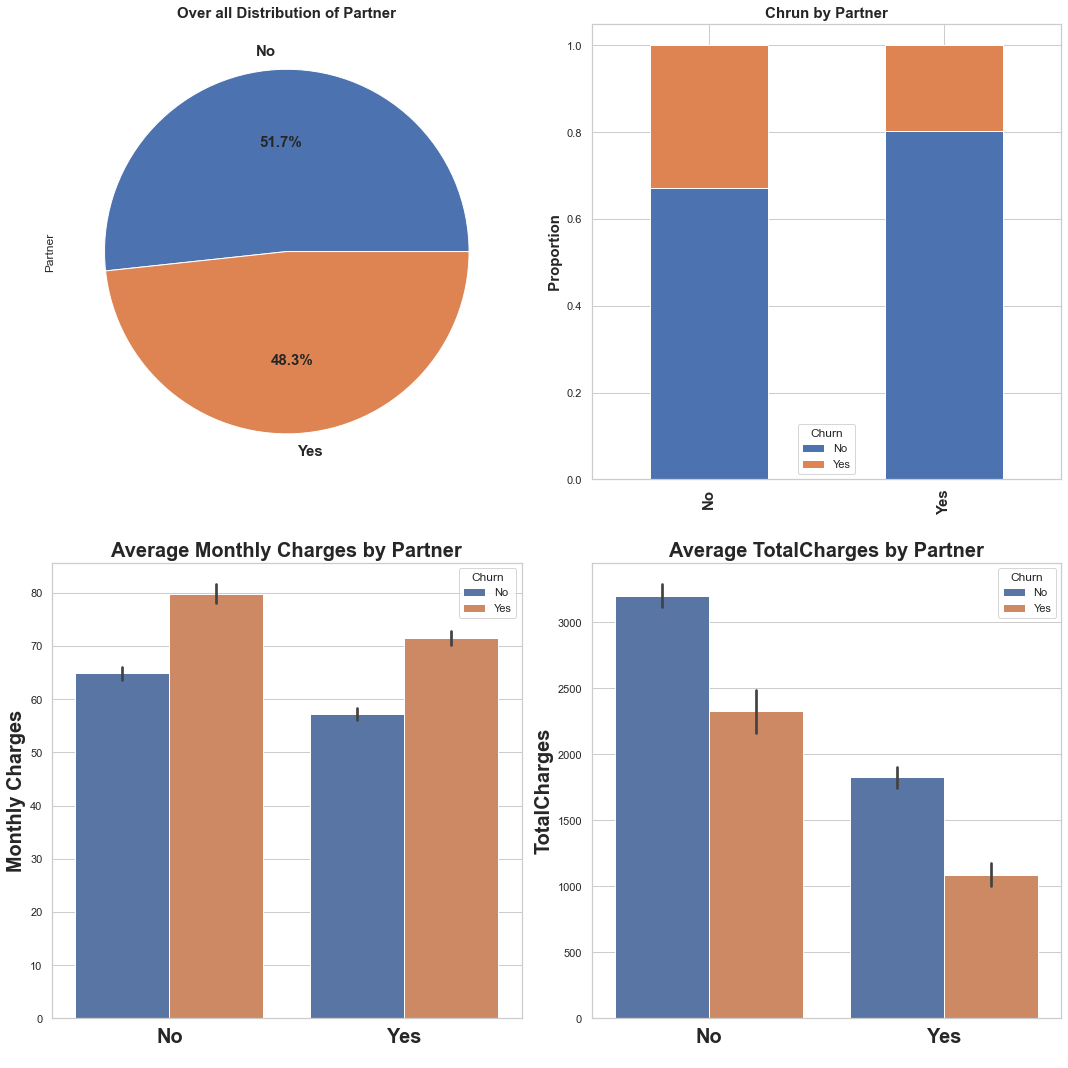

In [32]:
plot_partner_group(custdata)

In [33]:
Dependents=pd.crosstab(custdata["Dependents"],custdata["Churn"])
crosstabs.append(Dependents)
def plot_Dependents_group(custdata):
    
    fig,ax=plt.subplots(1,2,figsize=(15,15))
    ax1=plt.subplot(2,2,1)    
    custdata["Dependents"].value_counts().plot(kind='pie',ax=ax1, autopct = '%.1f%%', radius = 1, textprops = {'fontsize':15, 'fontweight':'bold'})
    plt.title("Over all Distribution of Dependents",fontsize=15, fontweight='bold')  
    
    ax2=plt.subplot(2,2,2)      
    
    Dependents.div(Dependents.sum(1).astype(float),axis=0).plot.bar(stacked=True,ax=ax2)  
    ax2.set_xlabel(" ")
    ax2.set_ylabel(" Proportion ",fontsize=15, fontweight='bold')
    ax2.set_title("Chrun by Dependents",fontsize=15, fontweight='bold')
    ax2.set_xticklabels(labels = ['No', 'Yes'], fontweight = 'bold', fontsize = 15)
    
    ax3=plt.subplot(2,2,3)
    sns.barplot(x="Dependents",y="MonthlyCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("Monthly Charges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['No', 'Yes'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by Dependents".format("Monthly Charges"),fontweight="bold",fontsize=20);
    
    ax3=plt.subplot(2,2,4)
    sns.barplot(x="Dependents",y="TotalCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("TotalCharges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['No', 'Yes'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by Dependents".format("TotalCharges"),fontweight="bold",fontsize=20);
    plt.tight_layout()

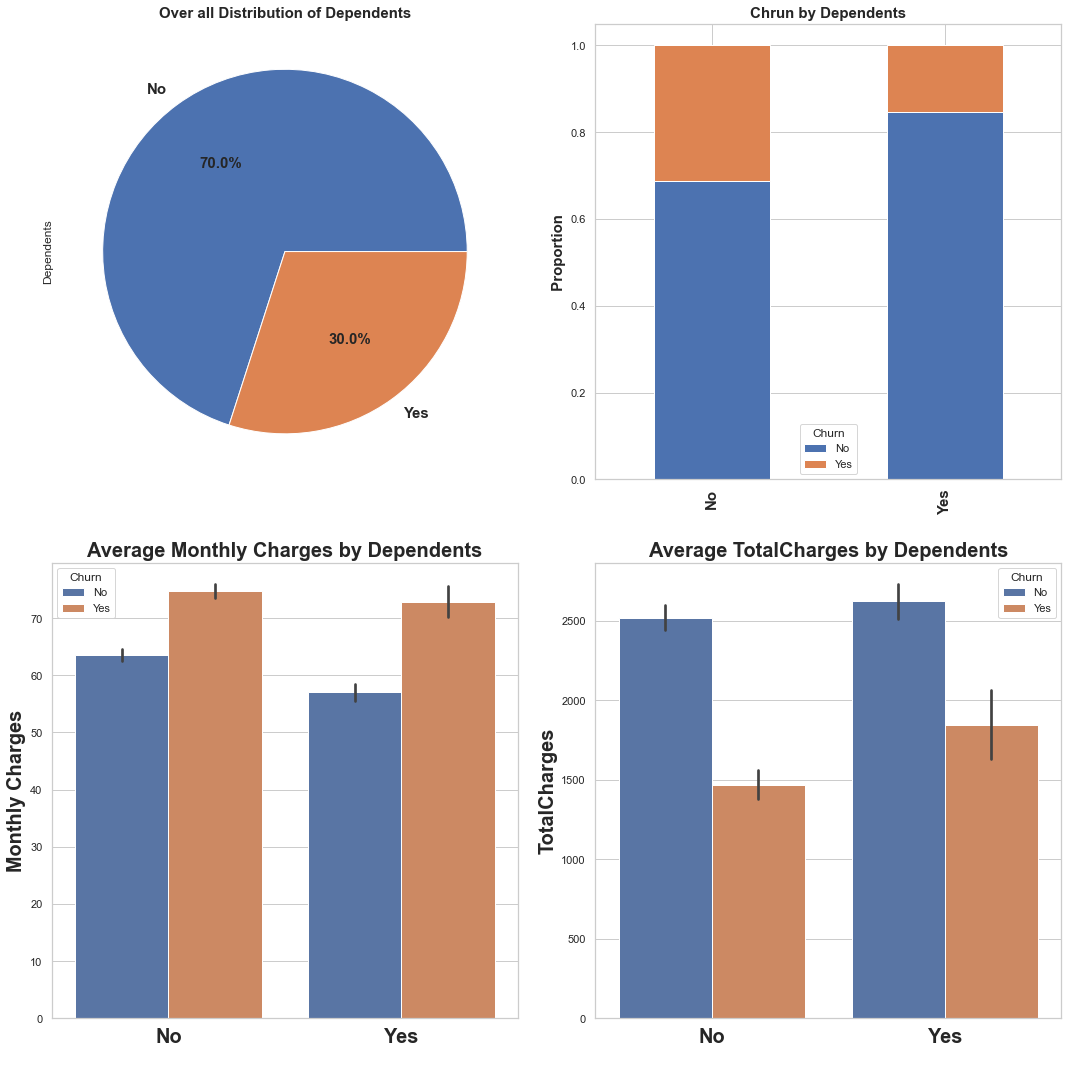

In [34]:
plot_Dependents_group(custdata)

#### Partner/Dependent Conclusions:
- Overall, those without partners are more likely to churn than those with partners
- Customers without dependents are more likely to churn than those with dependents
- Customers with dependents are paying higher total charges



In [35]:
PhoneService=pd.crosstab(custdata["PhoneService"],custdata["Churn"])
crosstabs.append(PhoneService)
def plot_PhoneService(custdata):
    
    fig,ax=plt.subplots(1,2,figsize=(15,15))
    ax1=plt.subplot(2,2,1)    
    custdata["PhoneService"].value_counts().plot(kind='pie',ax=ax1, autopct = '%.1f%%', radius = 1, textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title("Over all Distribution of PhoneService",fontsize=20, fontweight='bold')  
    
    ax2=plt.subplot(2,2,2)      
    PhoneService=pd.crosstab(custdata["PhoneService"],custdata["Churn"])
    PhoneService.div(PhoneService.sum(1).astype(float),axis=0).plot.bar(stacked=True,ax=ax2)  
    ax2.set_xlabel(" ")
    ax2.set_ylabel(" Proportion ",fontsize=15, fontweight='bold')
    ax2.set_title("Chrun by PhoneService",fontsize=20, fontweight='bold')
    ax2.set_xticklabels(labels = ['No', 'Yes'], fontweight = 'bold', fontsize = 20)
    
    ax3=plt.subplot(2,2,3)
    sns.barplot(x="PhoneService",y="MonthlyCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("Monthly Charges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['No', 'Yes'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by PhoneService".format("Monthly Charges"),fontweight="bold",fontsize=20);
    
    ax3=plt.subplot(2,2,4)
    sns.barplot(x="PhoneService",y="TotalCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("TotalCharges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['No', 'Yes'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by PhoneService".format("TotalCharges"),fontweight="bold",fontsize=20);
    plt.tight_layout()

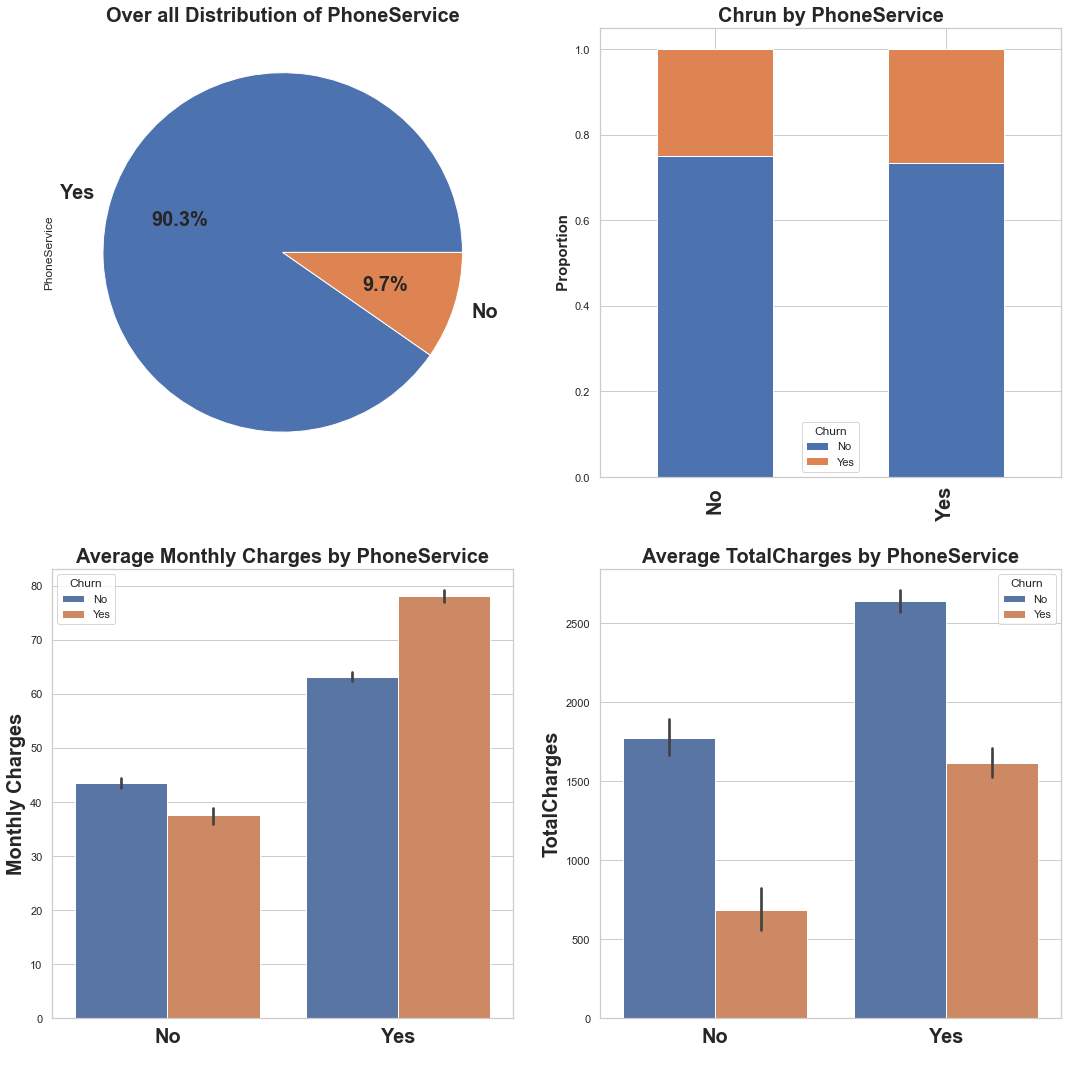

In [36]:
plot_PhoneService(custdata)

- Phone service has no significant effect on probability of customer churn
- Phone Service feature is dominated by customer counts who have phone service.
- Customers with higher monthly charges for phone service are more lilely to churn
- Customers with higher total charges for phone service are more lilely to churn

In [37]:
MultipleLines=pd.crosstab(custdata["MultipleLines"],custdata["Churn"])
crosstabs.append(MultipleLines)
def plot_MultipleLines(custdata):
    
    fig,ax=plt.subplots(1,2,figsize=(15,15))
    ax1=plt.subplot(2,2,1)    
    custdata["MultipleLines"].value_counts().plot(kind='pie',ax=ax1, autopct = '%.1f%%', radius = 1, textprops = {'fontsize':15, 'fontweight':'bold'})
    plt.title("Over all Distribution of MultipleLines",fontsize=15, fontweight='bold')  
    
    ax2=plt.subplot(2,2,2)      
    
    MultipleLines.div(MultipleLines.sum(1).astype(float),axis=0).plot.bar(stacked=True,ax=ax2)  
    ax2.set_xlabel(" ")
    ax2.set_ylabel(" Proportion ",fontsize=15, fontweight='bold')
    ax2.set_title("Chrun by MultipleLines",fontsize=15, fontweight='bold')
    ax2.set_xticklabels(labels = ['No',"No_phone_service",'Yes'], fontweight = 'bold', fontsize = 15)
    
    ax3=plt.subplot(2,2,3)
    sns.barplot(x="MultipleLines",y="MonthlyCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("Monthly Charges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['No', 'No_phone_service','Yes'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by MultipleLines".format("Monthly Charges"),fontweight="bold",fontsize=20);
    
    ax3=plt.subplot(2,2,4)
    sns.barplot(x="MultipleLines",y="TotalCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("TotalCharges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['No', 'No_phone_service','Yes'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by MultipleLines".format("TotalCharges"),fontweight="bold",fontsize=20);
    plt.tight_layout()
    plt.tight_layout()

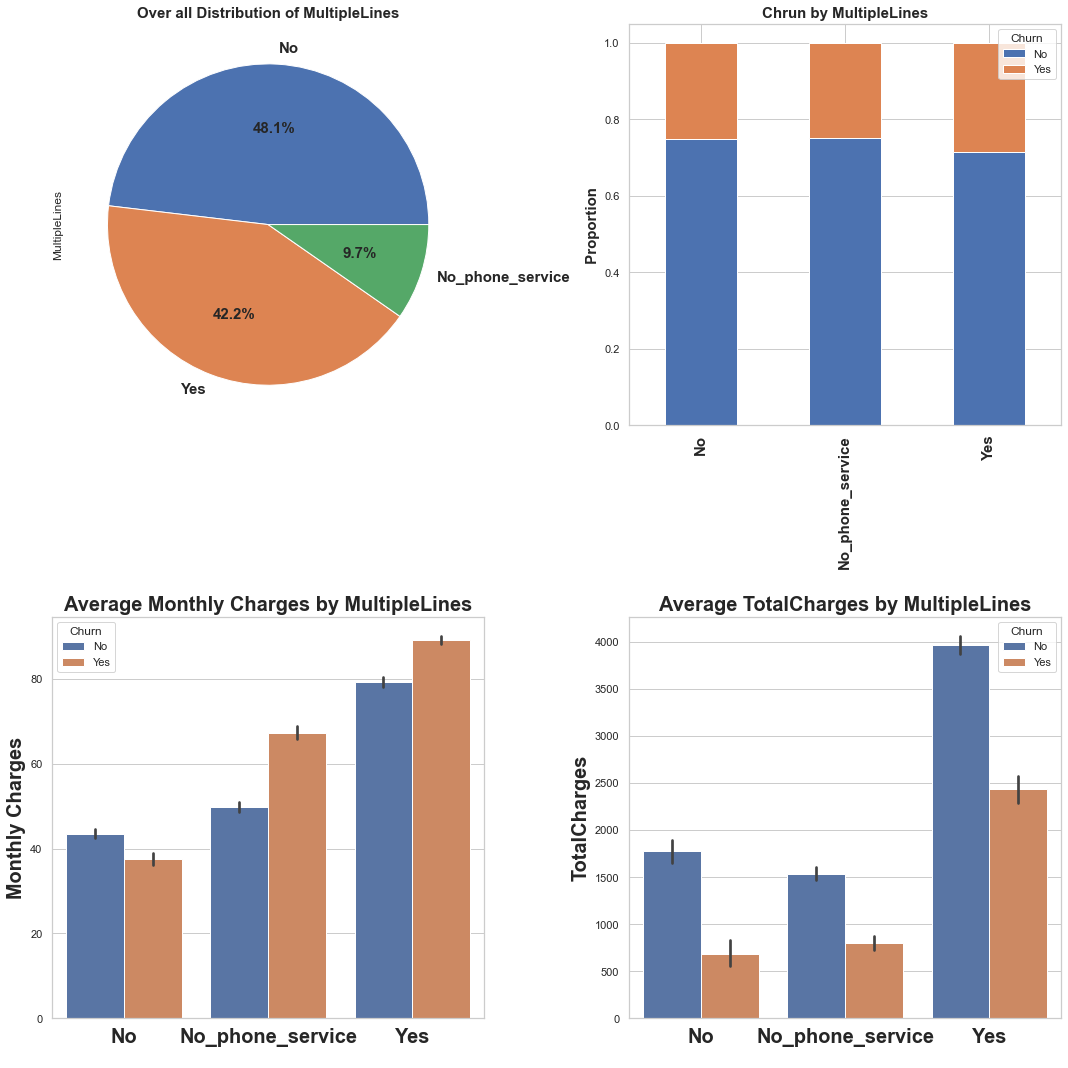

In [38]:
plot_MultipleLines(custdata)

- Customers with multiple line are paying higher monthly charges and are more likely churn
- Customers with multiple line are paying higher Total charges and are more likely churn than others

In [39]:
InternetService=pd.crosstab(custdata["InternetService"],custdata["Churn"])
crosstabs.append(InternetService)
def plot_InternetService(custdata):
    
    fig,ax=plt.subplots(1,2,figsize=(15,15))
    ax1=plt.subplot(2,2,1)    
    custdata["InternetService"].value_counts().plot(kind='pie',ax=ax1, autopct = '%.1f%%', radius = 1, textprops = {'fontsize':15, 'fontweight':'bold'})
    plt.title("Over all Distribution of InternetService",fontsize=15, fontweight='bold')  
    
    ax2=plt.subplot(2,2,2)      
    
    InternetService.div(InternetService.sum(1).astype(float),axis=0).plot.bar(stacked=True,ax=ax2)  
    ax2.set_xlabel(" ")
    ax2.set_ylabel(" Proportion ",fontsize=15, fontweight='bold')
    ax2.set_title("Chrun by InternetService",fontsize=15, fontweight='bold')
    ax2.set_xticklabels(labels = ['DSL', 'Fiber_optic',"No"], fontweight = 'bold', fontsize = 15)
    
    ax3=plt.subplot(2,2,3)
    sns.barplot(x="InternetService",y="MonthlyCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("Monthly Charges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['DSL', 'Fiber_optic',"No"], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by InternetService".format("Monthly Charges"),fontweight="bold",fontsize=20);
    
    ax3=plt.subplot(2,2,4)
    sns.barplot(x="InternetService",y="TotalCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("TotalCharges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['DSL', 'Fiber_optic',"No"], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by InternetService".format("TotalCharges"),fontweight="bold",fontsize=20);
    plt.tight_layout()
    plt.tight_layout()

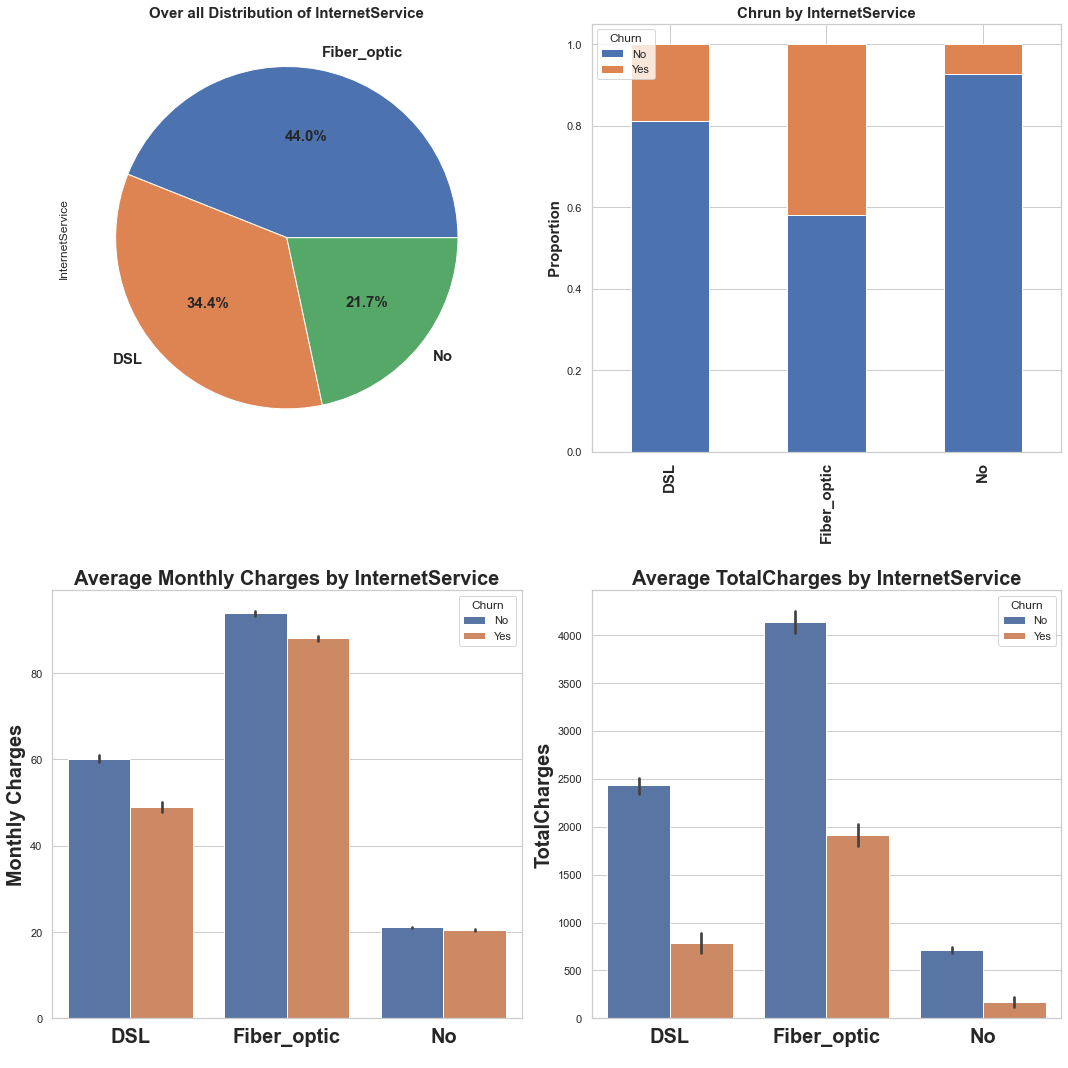

In [40]:
plot_InternetService(custdata)

- Customer with no internet service are less likely to churn
- Customer with fiber_optic service are most likely yo churn
- On an average customers with fiber optic are paying more monthly and total charges and thus are more likely to churn

In [41]:
OnlineSecurity=pd.crosstab(custdata["OnlineSecurity"],custdata["Churn"])
crosstabs.append(OnlineSecurity)
def plot_OnlineSecurity(custdata):
    
    fig,ax=plt.subplots(1,2,figsize=(15,15))
    ax1=plt.subplot(2,2,1)    
    custdata["OnlineSecurity"].value_counts().plot(kind='pie',ax=ax1, autopct = '%.1f%%', radius = 1, textprops = {'fontsize':15, 'fontweight':'bold'})
    plt.title("Over all Distribution of OnlineSecurity",fontsize=20, fontweight='bold')  
    
    ax2=plt.subplot(2,2,2)      
    
    OnlineSecurity.div(OnlineSecurity.sum(1).astype(float),axis=0).plot.bar(stacked=True,ax=ax2)  
    ax2.set_xlabel(" ")
    ax2.set_ylabel(" Proportion ",fontsize=20, fontweight='bold')
    ax2.set_title("Chrun by OnlineSecurity",fontsize=20, fontweight='bold')
    ax2.set_xticklabels(labels = ['No', 'No_internet_service','Yes'], fontweight = 'bold', fontsize = 15)
    
    ax3=plt.subplot(2,2,3)
    sns.barplot(x="OnlineSecurity",y="MonthlyCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("Monthly Charges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['No', 'No_internet_service','Yes'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by OnlineSecurity".format("Monthly Charges"),fontweight="bold",fontsize=20);
    
    ax3=plt.subplot(2,2,4)
    sns.barplot(x="OnlineSecurity",y="TotalCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("TotalCharges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['No', 'No_internet_service','Yes'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by OnlineSecurity".format("TotalCharges"),fontweight="bold",fontsize=20);
    plt.tight_layout()
    plt.tight_layout()

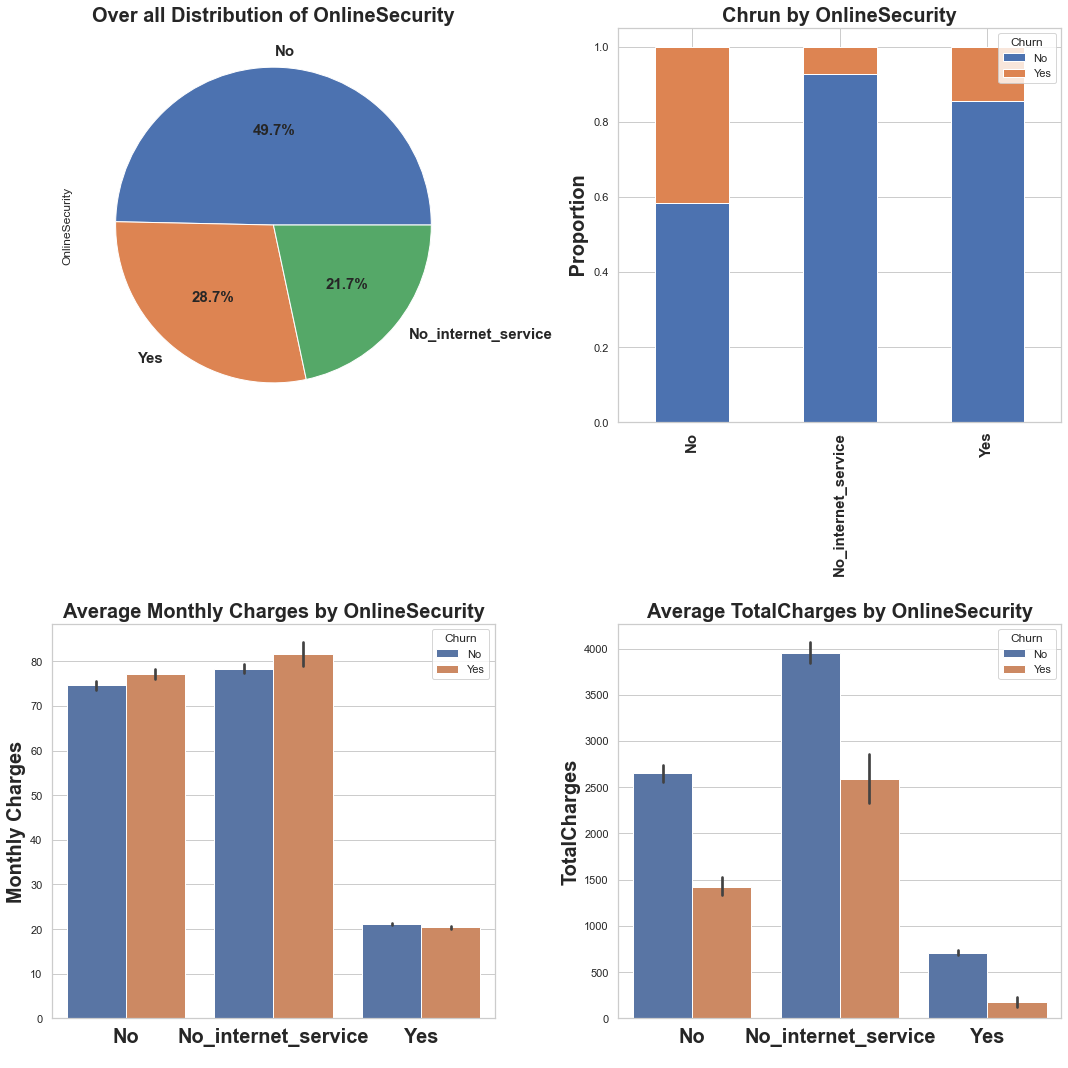

In [42]:
plot_OnlineSecurity(custdata)

- Customers with no online security are more likely to churn
- Customers with no internet service are least likey to churn
- Customer with no_internet service are paying higher monthly chagers and total charges for the service thus they are more likely to churn if we talk about churn rate based on monthly charges and total charges.On the contrary it is opposite for customers with online security facility

In [43]:
OnlineBackup=pd.crosstab(custdata["OnlineBackup"],custdata["Churn"])
crosstabs.append(OnlineBackup)
def plot_OnlineBackup(custdata):
    
    fig,ax=plt.subplots(1,2,figsize=(15,15))
    ax1=plt.subplot(2,2,1)    
    custdata["OnlineBackup"].value_counts().plot(kind='pie',ax=ax1, autopct = '%.1f%%', radius = 1, textprops = {'fontsize':15, 'fontweight':'bold'})
    plt.title("Over all Distribution of OnlineBackup",fontsize=20, fontweight='bold')  
    
    ax2=plt.subplot(2,2,2)      
    
    OnlineBackup.div(OnlineBackup.sum(1).astype(float),axis=0).plot.bar(stacked=True,ax=ax2)  
    ax2.set_xlabel(" ")
    ax2.set_ylabel(" Proportion ",fontsize=15, fontweight='bold')
    ax2.set_title("Chrun by OnlineBackup",fontsize=20, fontweight='bold')
    ax2.set_xticklabels(labels = ['No', 'No_internet_service','Yes'], fontweight = 'bold', fontsize = 15)
    
    ax3=plt.subplot(2,2,3)
    sns.barplot(x="OnlineBackup",y="MonthlyCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("Monthly Charges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['No', 'No_internet_service','Yes'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by OnlineBackup".format("Monthly Charges"),fontweight="bold",fontsize=20);
    
    ax3=plt.subplot(2,2,4)
    sns.barplot(x="OnlineBackup",y="TotalCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("TotalCharges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['No', 'No_internet_service','Yes'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by OnlineBackup".format("TotalCharges"),fontweight="bold",fontsize=20);
    plt.tight_layout()
    plt.tight_layout()

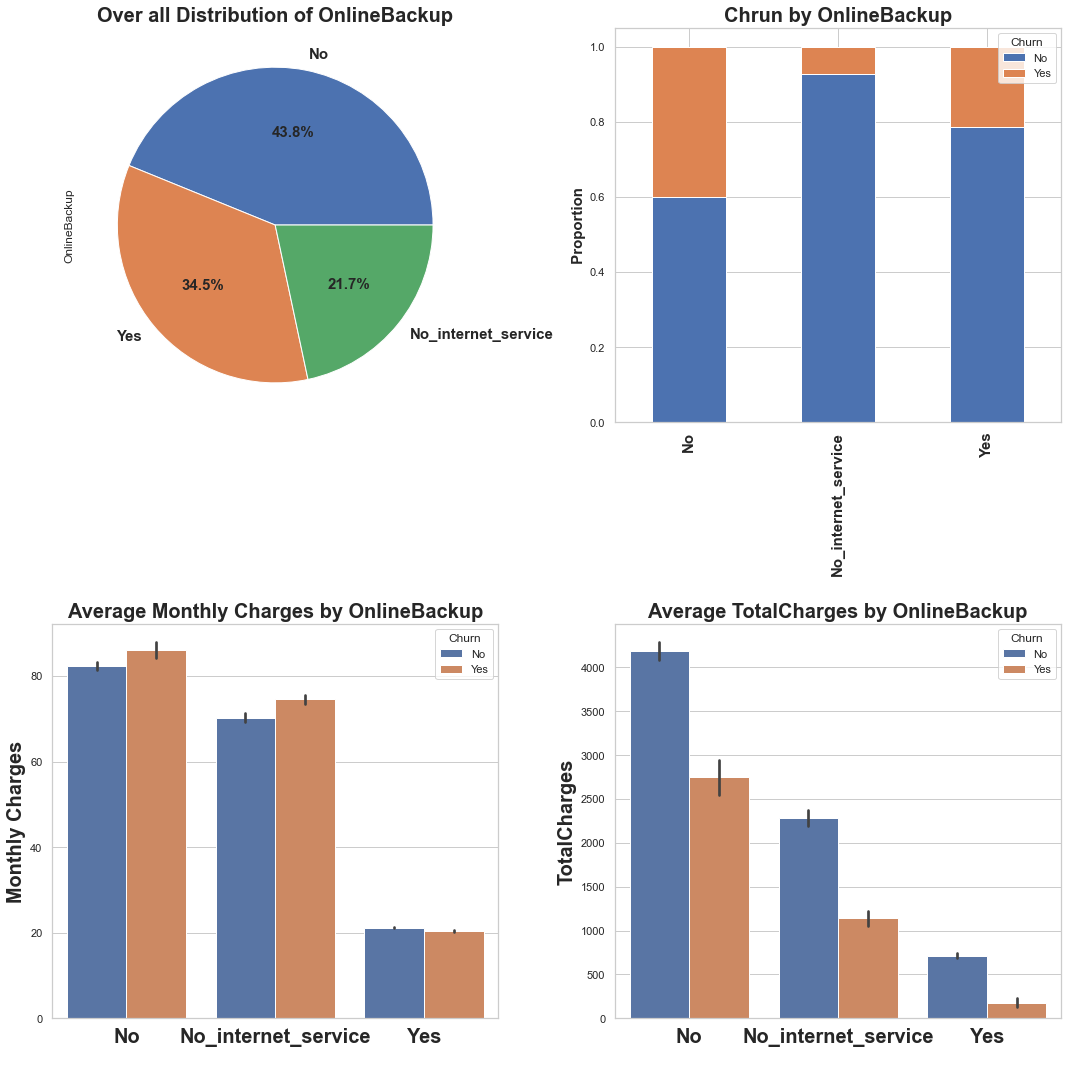

In [44]:
plot_OnlineBackup(custdata)

- Customers with no online Backup are more likely to churn
- Customers with no internet service are least likey to churn
- Customer with no online backup are paying higher monthly chagers and total charges for the service thus they are more likely to churn if we talk about churn rate based on monthly charges and total charges.On the contrary it is opposite for customers with online backup facility


In [45]:
DeviceProtection=pd.crosstab(custdata["DeviceProtection"],custdata["Churn"])
crosstabs.append(DeviceProtection)
def plot_DeviceProtection(custdata):
    
    fig,ax=plt.subplots(1,2,figsize=(15,15))
    ax1=plt.subplot(2,2,1)    
    custdata["DeviceProtection"].value_counts().plot(kind='pie',ax=ax1, autopct = '%.1f%%', radius = 1, textprops = {'fontsize':15, 'fontweight':'bold'})
    plt.title("Over all Distribution of DeviceProtection",fontsize=20, fontweight='bold')  
    
    ax2=plt.subplot(2,2,2)      
    
    DeviceProtection.div(DeviceProtection.sum(1).astype(float),axis=0).plot.bar(stacked=True,ax=ax2)  
    ax2.set_xlabel(" ")
    ax2.set_ylabel(" Proportion ",fontsize=15, fontweight='bold')
    ax2.set_title("Chrun by DeviceProtection",fontsize=20, fontweight='bold')
    ax2.set_xticklabels(labels = ['No', 'No_internet_service','Yes'], fontweight = 'bold', fontsize = 15)
    
    ax3=plt.subplot(2,2,3)
    sns.barplot(x="DeviceProtection",y="MonthlyCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("Monthly Charges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['No', 'No_internet_service','Yes'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by DeviceProtection".format("Monthly Charges"),fontweight="bold",fontsize=20);
    
    ax3=plt.subplot(2,2,4)
    sns.barplot(x="DeviceProtection",y="TotalCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("TotalCharges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['No', 'No_internet_service','Yes'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by DeviceProtection".format("TotalCharges"),fontweight="bold",fontsize=20);
    plt.tight_layout()
    plt.tight_layout()

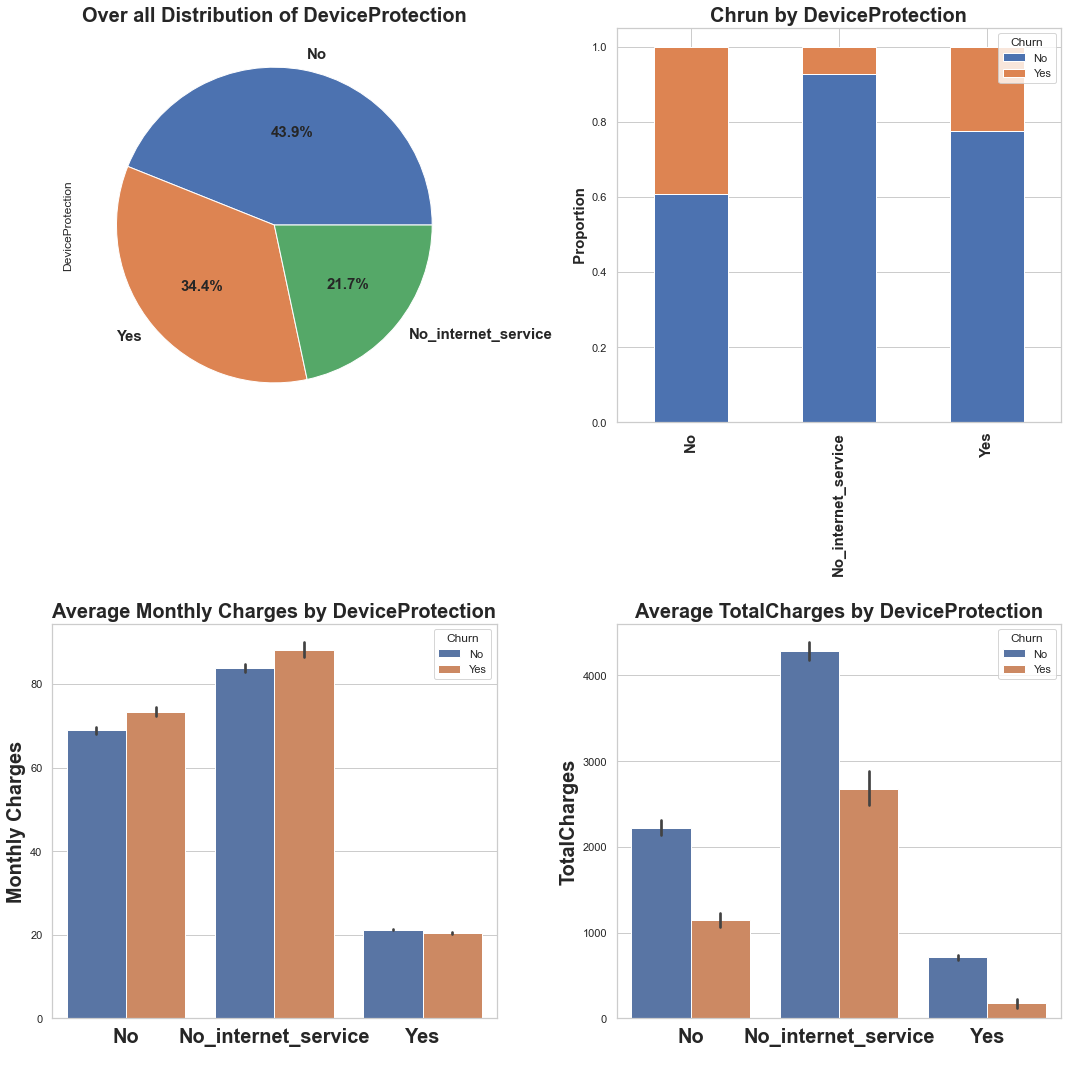

In [46]:
 plot_DeviceProtection(custdata)

- Customers with no DeviceProtection are more likely to churn
- Customers with no internet service are least likey to churn
- Customer with no Internet service are paying higher monthly chagers and total charges for the service thus they are more likely to churn if we talk about churn rate based on monthly charges and total charges.On the contrary it is opposite for customers with DeviceProtection facility

In [47]:
TechSupport=pd.crosstab(custdata["TechSupport"],custdata["Churn"])
crosstabs.append(TechSupport)
def plot_TechSupport(custdata):
    
    fig,ax=plt.subplots(1,2,figsize=(15,15))
    ax1=plt.subplot(2,2,1)    
    custdata["TechSupport"].value_counts().plot(kind='pie',ax=ax1, autopct = '%.1f%%', radius = 1, textprops = {'fontsize':15, 'fontweight':'bold'})
    plt.title("Over all Distribution of TechSupport",fontsize=20, fontweight='bold')  
    
    ax2=plt.subplot(2,2,2)      
    
    TechSupport.div(TechSupport.sum(1).astype(float),axis=0).plot.bar(stacked=True,ax=ax2)  
    ax2.set_xlabel(" ")
    ax2.set_ylabel(" Proportion ",fontsize=15, fontweight='bold')
    ax2.set_title("Chrun by TechSupport",fontsize=20, fontweight='bold')
    ax2.set_xticklabels(labels = ['No', 'No_internet_service','Yes'], fontweight = 'bold', fontsize = 15)
    
    ax3=plt.subplot(2,2,3)
    sns.barplot(x="TechSupport",y="MonthlyCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("Monthly Charges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['No', 'No_internet_service','Yes'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by TechSupport".format("Monthly Charges"),fontweight="bold",fontsize=20);
    
    ax3=plt.subplot(2,2,4)
    sns.barplot(x="TechSupport",y="TotalCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("TotalCharges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['No', 'No_internet_service','Yes'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by TechSupport".format("TotalCharges"),fontweight="bold",fontsize=20);
    plt.tight_layout()
    plt.tight_layout()

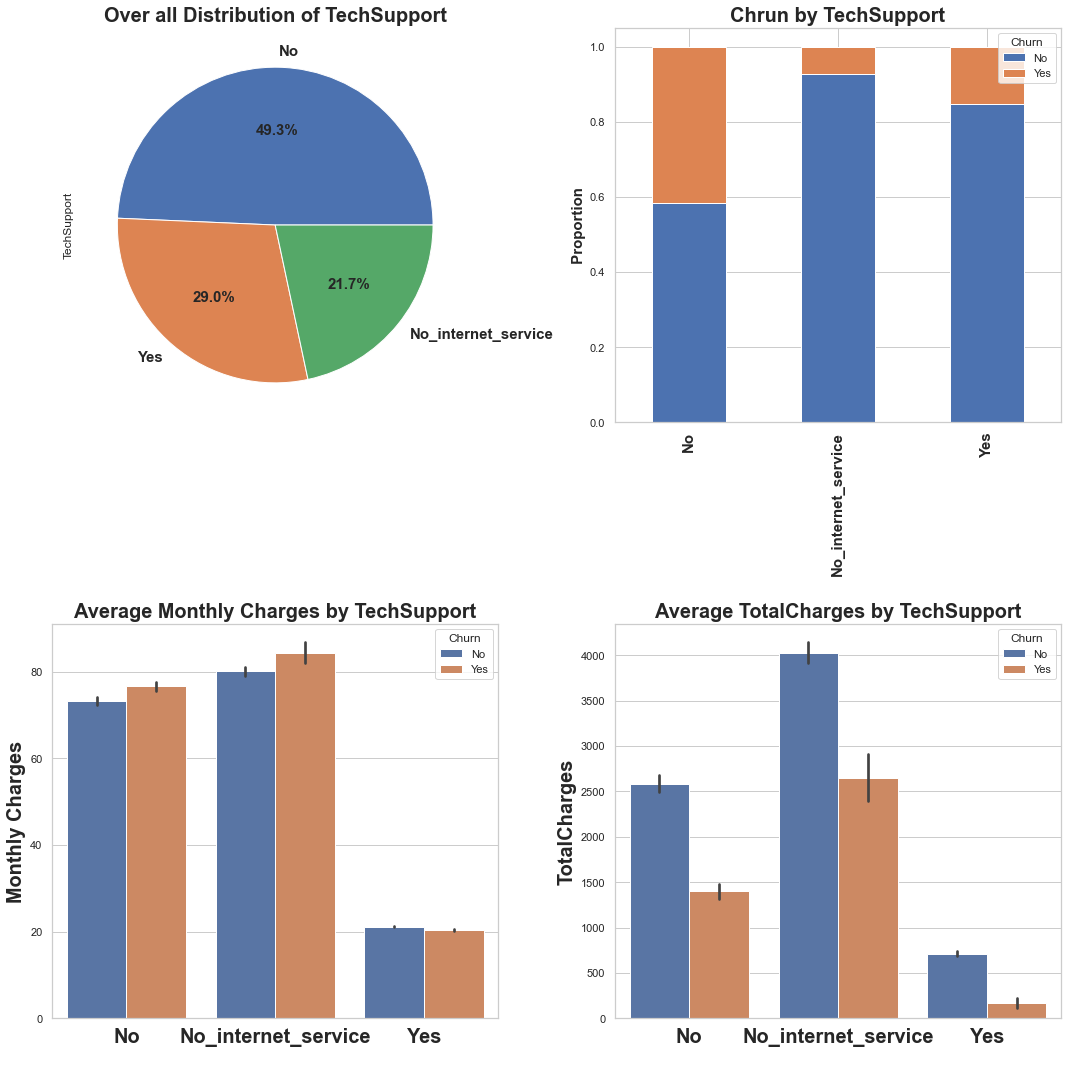

In [48]:
plot_TechSupport(custdata)

- Customers with no TechSupport are more likely to churn
- Customers with no internet service are least likey to churn
- Customer with no Internet service are paying higher monthly chagers and total charges for the service thus they are more likely to churn if we talk about churn rate based on monthly charges and total charges.On the contrary it is opposite for customers with TechSupport facility

In [49]:
StreamingTV=pd.crosstab(custdata["StreamingTV"],custdata["Churn"])
crosstabs.append(StreamingTV)
def plot_StreamingTV(custdata):
    
    fig,ax=plt.subplots(1,2,figsize=(15,15))
    ax1=plt.subplot(2,2,1)    
    custdata["StreamingTV"].value_counts().plot(kind='pie',ax=ax1, autopct = '%.1f%%', radius = 1, textprops = {'fontsize':15, 'fontweight':'bold'})
    plt.title("Over all Distribution of StreamingTV",fontsize=20, fontweight='bold')  
    
    ax2=plt.subplot(2,2,2)      
    
    StreamingTV.div(StreamingTV.sum(1).astype(float),axis=0).plot.bar(stacked=True,ax=ax2)  
    ax2.set_xlabel(" ")
    ax2.set_ylabel(" Proportion ",fontsize=15, fontweight='bold')
    ax2.set_title("Chrun by StreamingTV",fontsize=20, fontweight='bold')
    ax2.set_xticklabels(labels = ['No', 'No_internet_service','Yes'], fontweight = 'bold', fontsize = 15)
    
    ax3=plt.subplot(2,2,3)
    sns.barplot(x="StreamingTV",y="MonthlyCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("Monthly Charges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['No', 'No_internet_service','Yes'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by StreamingTV".format("Monthly Charges"),fontweight="bold",fontsize=20);
    
    ax3=plt.subplot(2,2,4)
    sns.barplot(x="StreamingTV",y="TotalCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("TotalCharges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['No', 'No_internet_service','Yes'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by StreamingTV".format("TotalCharges"),fontweight="bold",fontsize=20);
    plt.tight_layout()

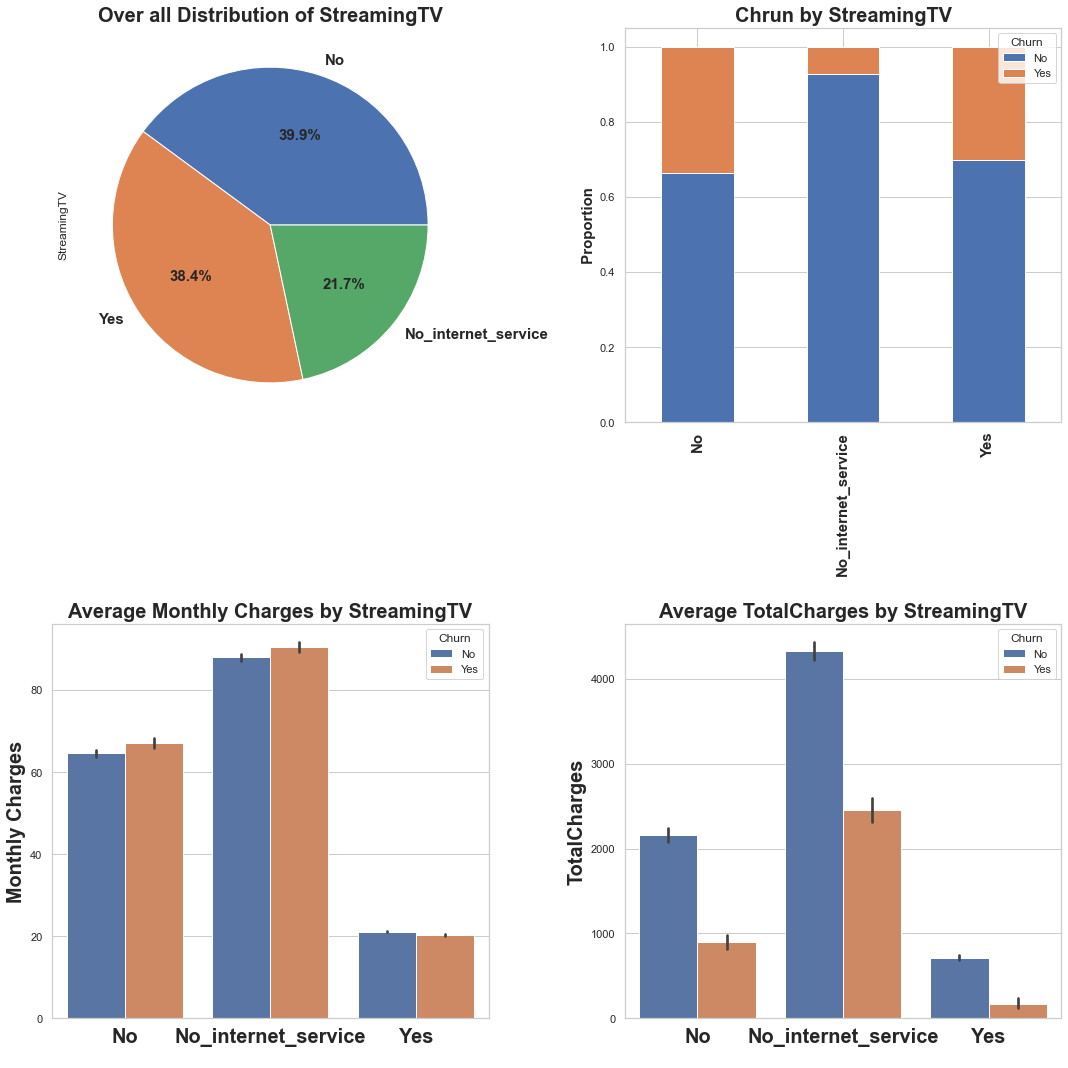

In [50]:
plot_StreamingTV(custdata)

- Customers those who dont have StreamingTV services and those who have StreamingTV services have equal probability of churning
- Customers with no internet service are least likey to churn
- Customer with no Internet service are paying higher monthly chagers and total charges for the service thus they are more likely to churn if we talk about churn rate based on monthly charges and total charges.On the contrary it is opposite for customers with StreamingTV facility

In [51]:
StreamingMovies=pd.crosstab(custdata["StreamingMovies"],custdata["Churn"])
crosstabs.append(StreamingMovies)
def plot_StreamingMovies(custdata):
    
    fig,ax=plt.subplots(1,2,figsize=(15,15))
    ax1=plt.subplot(2,2,1)    
    custdata["StreamingMovies"].value_counts().plot(kind='pie',ax=ax1, autopct = '%.1f%%', radius = 1, textprops = {'fontsize':15, 'fontweight':'bold'})
    plt.title("Over all Distribution of StreamingMovies",fontsize=20, fontweight='bold')  
    
    ax2=plt.subplot(2,2,2)      
    
    StreamingMovies.div(StreamingMovies.sum(1).astype(float),axis=0).plot.bar(stacked=True,ax=ax2)  
    ax2.set_xlabel(" ")
    ax2.set_ylabel(" Proportion ",fontsize=15, fontweight='bold')
    ax2.set_title("Chrun by StreamingMovies",fontsize=20, fontweight='bold')
    ax2.set_xticklabels(labels = ['No', 'No_internet_service','Yes'], fontweight = 'bold', fontsize = 15)
    
    ax3=plt.subplot(2,2,3)
    sns.barplot(x="StreamingMovies",y="MonthlyCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("Monthly Charges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['No', 'No_internet_service','Yes'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by StreamingMovies".format("Monthly Charges"),fontweight="bold",fontsize=20);
    
    ax3=plt.subplot(2,2,4)
    sns.barplot(x="StreamingMovies",y="TotalCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("TotalCharges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['No', 'No_internet_service','Yes'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by StreamingMovies".format("TotalCharges"),fontweight="bold",fontsize=20);
    plt.tight_layout()
   

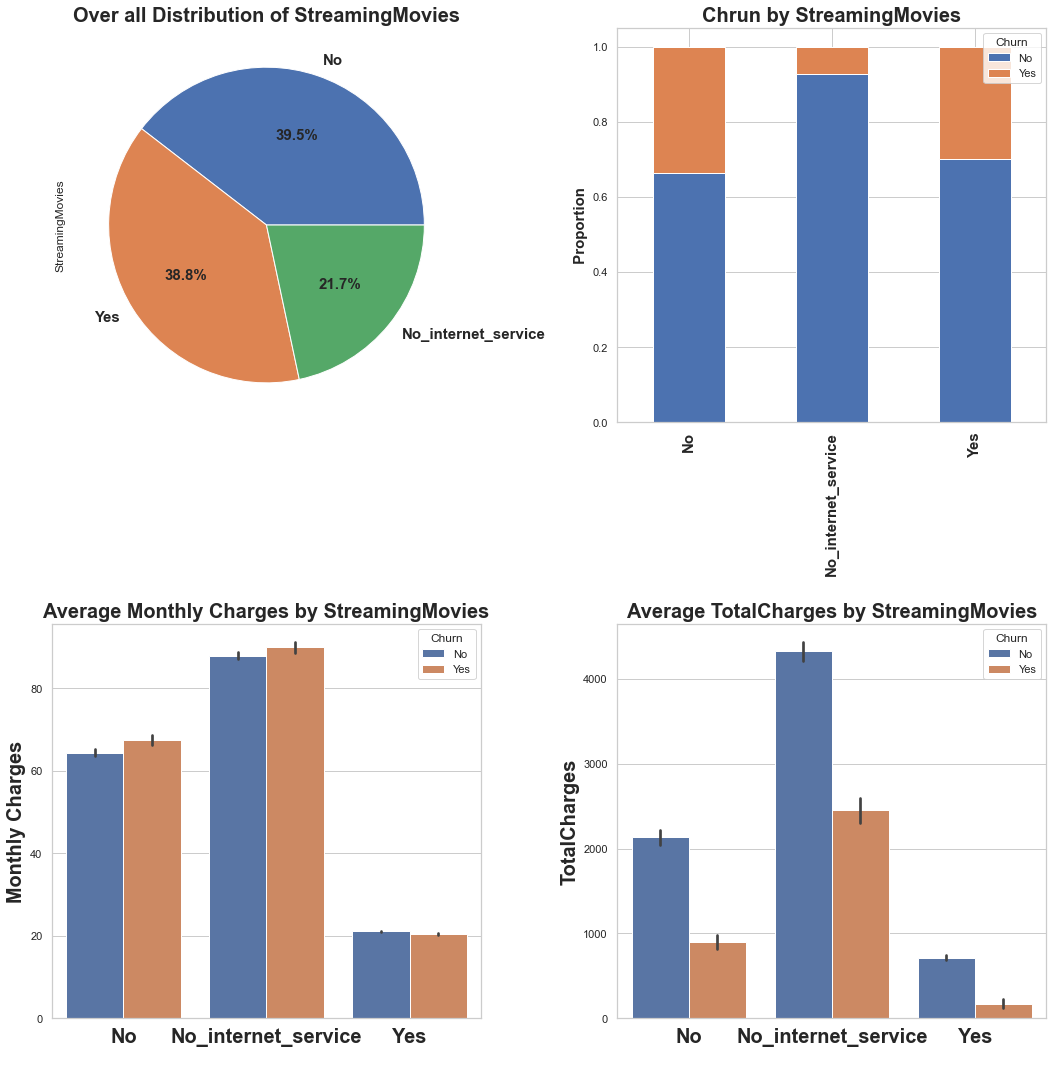

In [52]:
plot_StreamingMovies(custdata)

- Customers those who dont have StreamingTV services and those who have StreamingTV services have equal probability of churning
- Customers with no internet service are least likey to churn
- Customer with no Internet service are paying higher monthly chagers and total charges for the service thus they are more likely to churn if we talk about churn rate based on monthly charges and total charges.On the contrary it is opposite for customers with StreamingMoviesfacility

In [53]:
Contract=pd.crosstab(custdata["Contract"],custdata["Churn"])
crosstabs.append(Contract)
def plot_Contract(custdata):
    
    fig,ax=plt.subplots(1,2,figsize=(15,15))
    ax1=plt.subplot(2,2,1)    
    custdata["Contract"].value_counts().plot(kind='pie',ax=ax1, autopct = '%.1f%%', radius = 1, textprops = {'fontsize':15, 'fontweight':'bold'})
    plt.title("Over all Distribution of Contract",fontsize=20, fontweight='bold')  
    
    ax2=plt.subplot(2,2,2)      
    
    Contract.div(Contract.sum(1).astype(float),axis=0).plot.bar(stacked=True,ax=ax2)  
    ax2.set_xlabel(" ")
    ax2.set_ylabel(" Proportion ",fontsize=15, fontweight='bold')
    ax2.set_title("Chrun by Contract",fontsize=20, fontweight='bold')
    ax2.set_xticklabels(labels = ['Month-to-Month', 'One_year','Two_year'], fontweight = 'bold', fontsize = 15)
    
    ax3=plt.subplot(2,2,3)
    sns.barplot(x="Contract",y="MonthlyCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("Monthly Charges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['Month-to-Month', 'One_year','Two_year'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by Contract".format("Monthly Charges"),fontweight="bold",fontsize=20);
    
    ax3=plt.subplot(2,2,4)
    sns.barplot(x="Contract",y="TotalCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("TotalCharges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['Month-to-Month', 'One_year','Two_year'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by Contract".format("TotalCharges"),fontweight="bold",fontsize=20);
    plt.tight_layout()

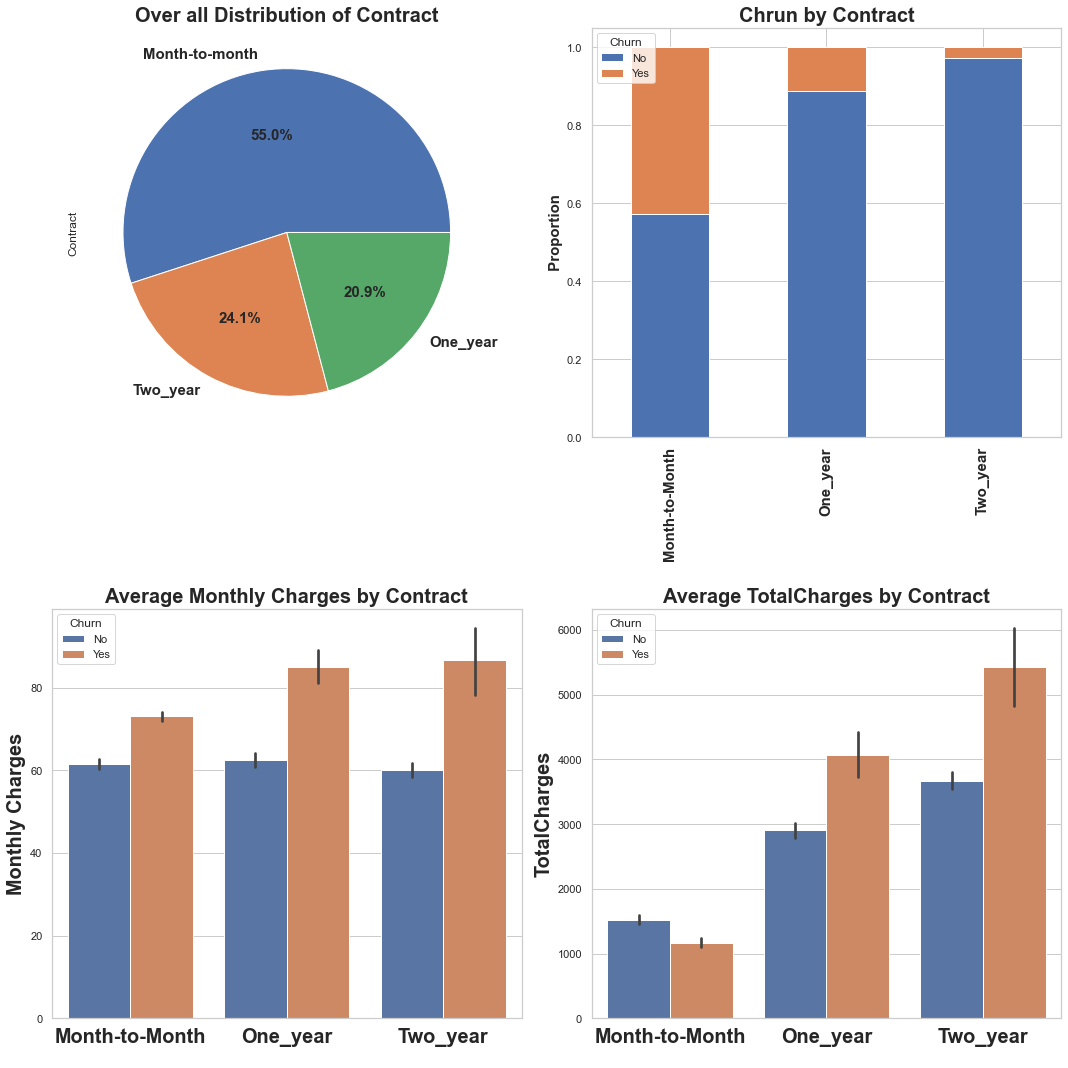

In [54]:
plot_Contract(custdata)

- Customers with month to month contract with company have hihest probability of churning
- Customers with two year contract are least likey to churn
- Customer with Two year contract are paying higher monthly chagers and total charges for the service thus they are more likely to churn if we talk about churn rate based on monthly charges and total charges.On the contrary it is opposite for customers with Month to month contract

In [55]:
PaperlessBilling=pd.crosstab(custdata["PaperlessBilling"],custdata["Churn"])
crosstabs.append(PaperlessBilling)
def plot_PaperlessBilling(custdata):
    
    fig,ax=plt.subplots(1,2,figsize=(15,15))
    ax1=plt.subplot(2,2,1)    
    custdata["PaperlessBilling"].value_counts().plot(kind='pie',ax=ax1, autopct = '%.1f%%', radius = 1, textprops = {'fontsize':15, 'fontweight':'bold'})
    plt.title("Over all Distribution of PaperlessBilling",fontsize=20, fontweight='bold')  
    
    ax2=plt.subplot(2,2,2)      
   
    PaperlessBilling.div(PaperlessBilling.sum(1).astype(float),axis=0).plot.bar(stacked=True,ax=ax2)  
    ax2.set_xlabel(" ")
    ax2.set_ylabel(" Proportion ",fontsize=15, fontweight='bold')
    ax2.set_title("Chrun by PaperlessBilling",fontsize=20, fontweight='bold')
    ax2.set_xticklabels(labels = ['No','Yes'], fontweight = 'bold', fontsize = 15)
    
    ax3=plt.subplot(2,2,3)
    sns.barplot(x="PaperlessBilling",y="MonthlyCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("Monthly Charges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['No','Yes'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by PaperlessBilling".format("Monthly Charges"),fontweight="bold",fontsize=20);
    
    ax3=plt.subplot(2,2,4)
    sns.barplot(x="PaperlessBilling",y="TotalCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("TotalCharges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['No','Yes'], fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by PaperlessBilling".format("TotalCharges"),fontweight="bold",fontsize=20);
    plt.tight_layout()

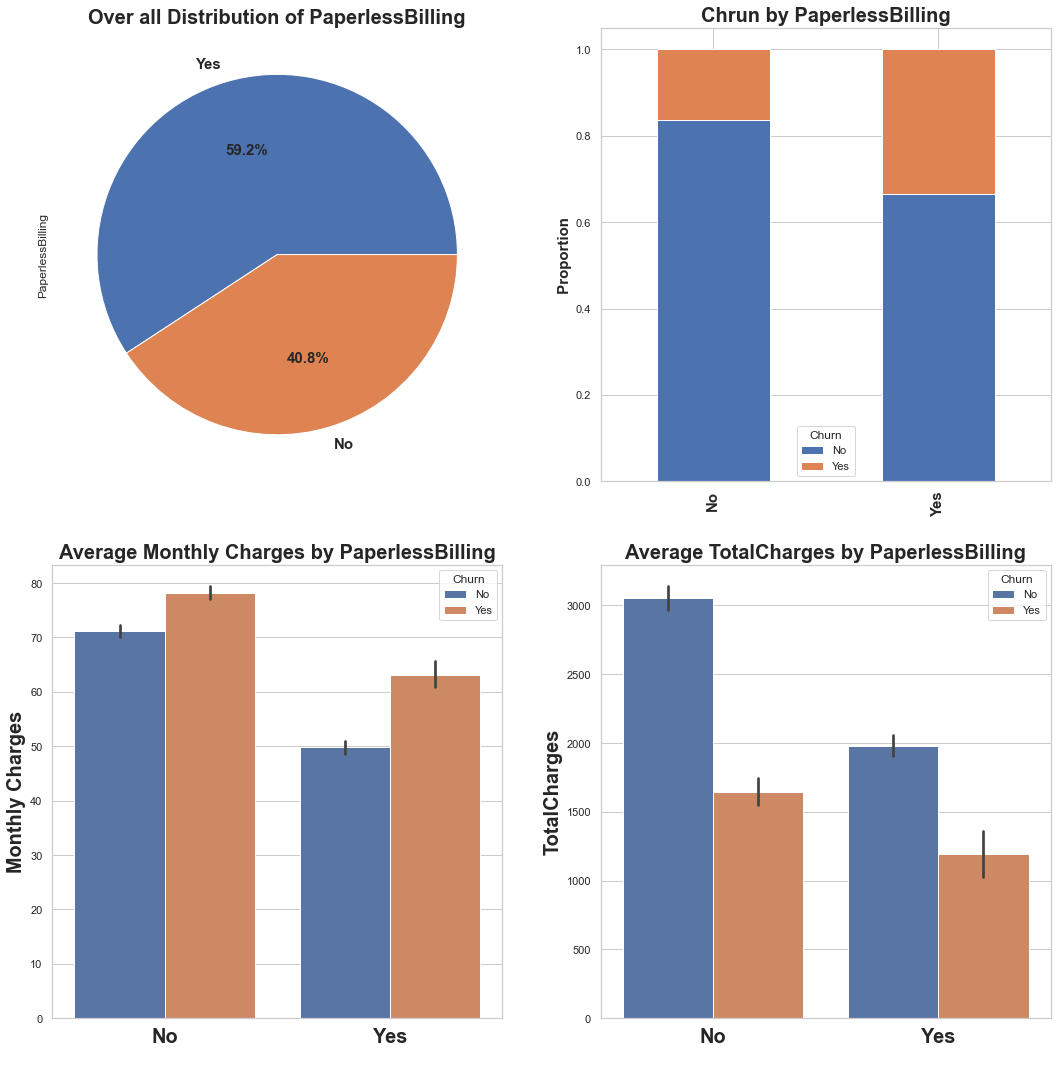

In [56]:
plot_PaperlessBilling(custdata)

- customers with paperless billing facility are more likely to churn
- Customer without paperless billing are paying higher monthly chagers and total charges for the service thus they are more likely to churn if we talk about churn rate based on monthly charges and total charges.On the contrary it is opposite for customers with paperless billing contract

In [57]:
PaymentMethod=pd.crosstab(custdata["PaymentMethod"],custdata["Churn"])
crosstabs.append(PaymentMethod)
def plot_PaymentMethod(custdata):
    
    fig,ax=plt.subplots(1,2,figsize=(15,15))
    ax1=plt.subplot(2,2,1)    
    custdata["PaymentMethod"].value_counts().plot(kind='pie',ax=ax1, autopct = '%.1f%%', radius = 1, textprops = {'fontsize':15, 'fontweight':'bold'})
    plt.title("Over all Distribution of PaymentMethod",fontsize=20, fontweight='bold')  
    
    ax2=plt.subplot(2,2,2)      
    
    PaymentMethod.div(PaymentMethod.sum(1).astype(float),axis=0).plot.bar(stacked=True,ax=ax2)  
    ax2.set_xlabel(" ")
    ax2.set_ylabel(" Proportion ",fontsize=15, fontweight='bold')
    ax2.set_title("Chrun by PaymentMethod",fontsize=20, fontweight='bold')
    ax2.set_xticklabels(labels = ['Bank transfer (automatic)', 'Credit card (automatic)','Electronic check','Mailed check'],rotation = 90, fontweight = 'bold', fontsize = 15)
    
    ax3=plt.subplot(2,2,3)
    sns.barplot(x="PaymentMethod",y="MonthlyCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("Monthly Charges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['Bank transfer (automatic)', 'Credit card (automatic)','Electronic check','Mailed check'],rotation = 90, fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by PaymentMethod".format("Monthly Charges"),fontweight="bold",fontsize=20);
    
    ax3=plt.subplot(2,2,4)
    sns.barplot(x="PaymentMethod",y="TotalCharges",data=custdata,hue="Churn")
    plt.xlabel(" ")
    plt.ylabel("TotalCharges",fontweight="bold",fontsize="20")
    ax3.set_xticklabels(labels = ['Bank transfer (automatic)', 'Credit card (automatic)','Electronic check','Mailed check'],rotation = 90, fontweight = 'bold', fontsize = 20)
    plt.title("Average {} by PaymentMethod".format("TotalCharges"),fontweight="bold",fontsize=20);
    plt.tight_layout()

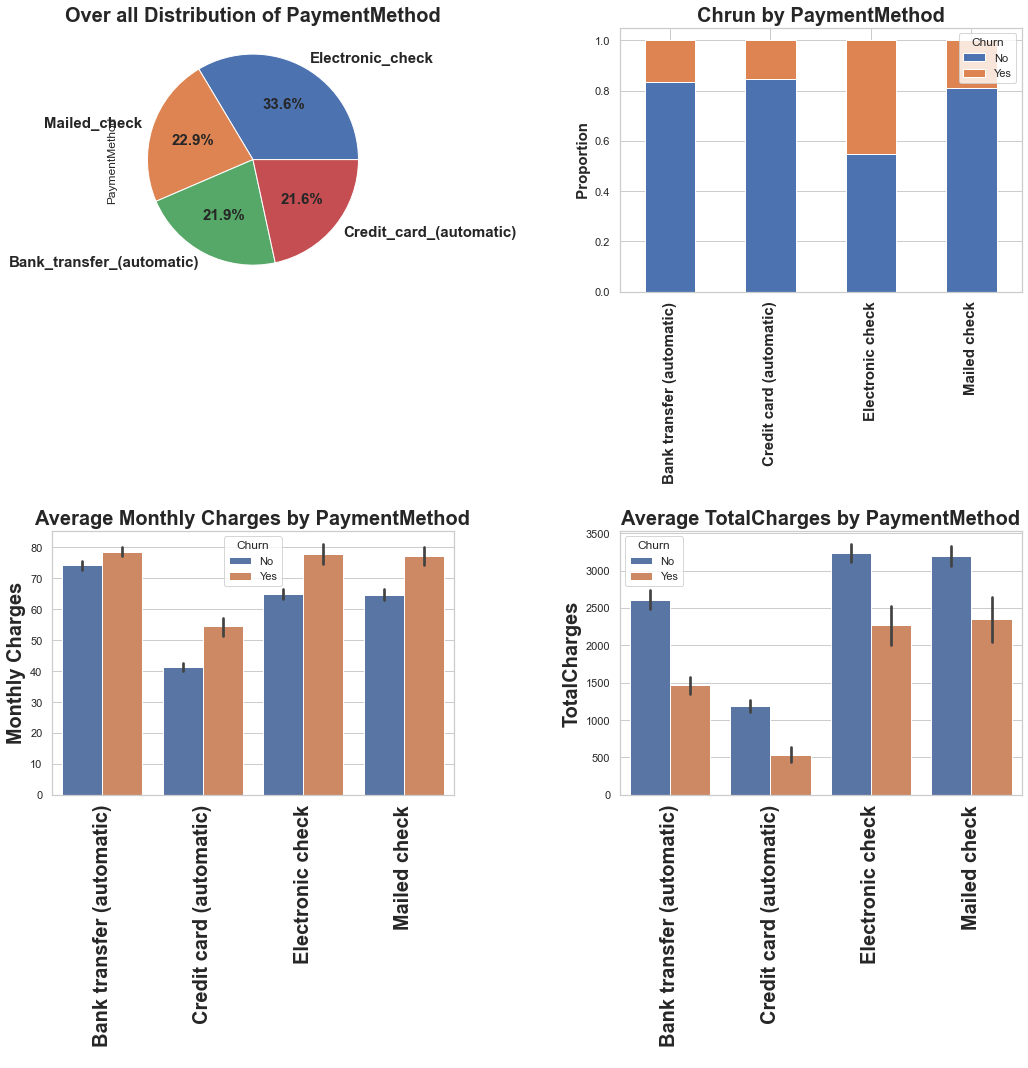

In [58]:
plot_PaymentMethod(custdata)

- customers with Electronic Check facility are more likely to churn
- Customer credit card(automatic) are paying higher monthly chagers thus they are more likely to churn if we talk   about churn rate based on monthly charges
- Monthly charges paid has no effect on churn probability of custopmers with Bank transfer(automatic),electronic check and mailed check
- Total charges paid has no effect on churn probability of custopmers with electronic check and mailed check.
- Customers with credit card(automatic are paying least total charges for the service and have least churn probability

In [59]:
#droping the grouped tenure column made just for visualization
custdata.drop("Tenure_groups",axis=1,inplace=True)

## Hypothesis Testing
### Testing the independence of categorical Features with Target Variable (Chi Square Test for independence)
     - Null Hypothesis:  There is no relationship between Feature and target variable 
     - Alternate Hypothesis: There is a significant relationship between Feature and target variable 

In [60]:
column=custdata.select_dtypes(include="object").columns.tolist()
column.append("SeniorCitizen")
column.remove("Churn")
for tab, col in [(crosstabs[0],"gender"),(crosstabs[1],"SeniorCitizen"),(crosstabs[2],"Partner"),(crosstabs[3],"Dependents"),(crosstabs[4],"PhoneService"),
                 (crosstabs[5],"MultipleLines"),(crosstabs[6],"InternetService"),(crosstabs[7],"OnlineSecurity"),(crosstabs[8],"OnlineBackup"),(crosstabs[9],"DeviceProtection"),                                                                                                   
                 (crosstabs[10],"TechSupport"),(crosstabs[11],"StreamingTV"),(crosstabs[12],"StreamingMovies"),(crosstabs[13],"Contract"),(crosstabs[14],"PaperlessBilling"),
                 (crosstabs[15],"PaymentMethod")
                ]:
    stats,p_value,_,_=chi2_contingency(tab)
    
    if p_value<0.05:
         print("There is a significant relationship between {} and Churn".format(col))            
    else:
         print("There is no relationship between {} and Churn".format(col))

There is no relationship between gender and Churn
There is a significant relationship between SeniorCitizen and Churn
There is a significant relationship between Partner and Churn
There is a significant relationship between Dependents and Churn
There is no relationship between PhoneService and Churn
There is a significant relationship between MultipleLines and Churn
There is a significant relationship between InternetService and Churn
There is a significant relationship between OnlineSecurity and Churn
There is a significant relationship between OnlineBackup and Churn
There is a significant relationship between DeviceProtection and Churn
There is a significant relationship between TechSupport and Churn
There is a significant relationship between StreamingTV and Churn
There is a significant relationship between StreamingMovies and Churn
There is a significant relationship between Contract and Churn
There is a significant relationship between PaperlessBilling and Churn
There is a signifi

### Testing the independence of Numerical  Features with Target Variable(Independent t-test)

    Null Hypothesis: There is no significant difference in feature Variable for different categories of Target variable
    Alternate Hypothesis:There is significant difference in feature for different categories of Target variable



In [61]:

numcols=custdata.select_dtypes(include="number").columns.tolist()
numcols.remove("SeniorCitizen")
for col in numcols:
    class_yes=custdata[custdata["Churn"]=='Yes'][col]
    class_no=custdata[custdata["Churn"]=="No"][col]
    fstats,p_value=ttest_ind(class_yes,class_no,equal_var=False)
    if p_value<0.05:
        print("There is significant difference in {} for different categories of Churn".format(col))
    else:
        print("There is no significant difference in {} for different categories of Churn".format(col))
    

There is significant difference in tenure for different categories of Churn
There is significant difference in MonthlyCharges for different categories of Churn
There is significant difference in TotalCharges for different categories of Churn


### Dropping the columns which have no association and correlation with target column

In [15]:
custdata.drop(["gender","PhoneService"],axis=1,inplace=True)

## Data preprocessing

In [16]:
#Encoding Target Variable
custdata["Churn"]=custdata["Churn"].replace({'Yes':1,"No":0})

### OneHotEncoding

In [17]:
# Deleting the one of the encoded columns for categorical variable with only two categories and keeping all the encoded columns of 
# of categorical variable with more than two variable
for cols in custdata.select_dtypes(include="object").columns:
    if custdata[cols].nunique()>2:
        custdata=pd.get_dummies(custdata,columns=[cols])
    else:
        custdata=pd.get_dummies(custdata,columns=[cols],drop_first=True)
        

In [18]:
#Segregating predictora and Target Variable
X=custdata.drop("Churn",axis=1).copy()
y=custdata["Churn"].copy()

In [19]:
y.value_counts(normalize=True)

0    0.73463
1    0.26537
Name: Churn, dtype: float64

- So we see that only 27% of the people in the dataset left the company.Because of this when we split the data into training and testing, we will split using stratification in order to maintain the same percentage of people who left the company in both the training set and the testing set.
 - Here it is evident that Class 0 has maximum contribution in the data set thus making it an imbalanced data
 
Class imbalanced in data sets, has a potential impact in the training procedure of a classifier by learning a model that will be biased in favor of the majority class.

- Thus Balancing is required

In [20]:
#separating randomly 10% of the whole data for future predictions
X, X_test, y, y_test = train_test_split (X,y, test_size=0.1, train_size=0.9,stratify=y )
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.20, train_size =0.80,stratify=y)

### Checking if the train and test data have similar statistical characteristics when compared with original data

In [21]:
#Does the mean of Original Data differ significantly from the test and train data
#H0: the mean of Original Data and Train/test data is same
#H1: the mean of Original Data and Train/test data is significantly different
def test_stats(Sample1,Sample2):
    alpha=0.05
    stats,p_value =ttest_ind(Sample1.all(),Sample2.all(),equal_var=False)
    if p_value<0.05:
        print("RESULT:the two sample mean are significantly different")
    else:
        print("RESULT:the two sample mean are same ")

In [22]:
print("Comparing X and X_train")
test_stats(X,X_train)
print("")
print("Comparing X and X_test")
test_stats(X,X_test)
print("")
print("Comparing y and y_train")
test_stats(y,y_train)
print("")
print("Comparing y and y_test")
test_stats(y,y_test)

Comparing X and X_train
RESULT:the two sample mean are same 

Comparing X and X_test
RESULT:the two sample mean are same 

Comparing y and y_train
RESULT:the two sample mean are same 

Comparing y and y_test
RESULT:the two sample mean are same 


In [23]:
y_train.value_counts(normalize=True)

0    0.734714
1    0.265286
Name: Churn, dtype: float64

In [24]:
y_test.value_counts(normalize=True)

0    0.734752
1    0.265248
Name: Churn, dtype: float64

I have used stratify to maintain the proportion of positive and negative classes even after train test split because out data is imbalanced

# Build Model
 ## Baseline DecisionTreeClassifier on imbalanced Data

In [25]:
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [26]:
y_pred1=dtree.predict(X_val)
y_pred_proba1=dtree.predict_proba(X_val)


In [27]:
print("Training Accuracy",dtree.score(X_train,y_train))
print("Test Accuracy",dtree.score(X_val,y_val))
print("Area under the curve",roc_auc_score(y_val,y_pred_proba1[:,1]))


Training Accuracy 0.9980276134122288
Test Accuracy 0.7279179810725552
Area under the curve 0.6649035687990642


 - this clearly shows it is overfitting
 

======= Classification Report BASELINE DecisionTree Classifier=======
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       931
           1       0.49      0.53      0.51       337

    accuracy                           0.73      1268
   macro avg       0.66      0.66      0.66      1268
weighted avg       0.74      0.73      0.73      1268



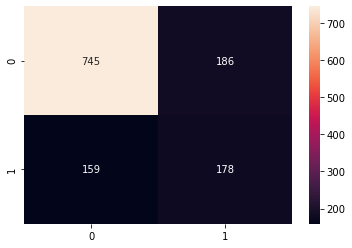

In [28]:
sns.heatmap(confusion_matrix(y_val,y_pred1),annot=True,fmt='.0f')
print("======= Classification Report BASELINE DecisionTree Classifier=======")
print(classification_report(y_val,y_pred1))


- our minority class's recall,precision and f1_score is clearly suffering 
- as our Class of interest is class 1 and it is evident that our model's recall and f1-score is lacking in predicting class 1
- the model is not performing good at classifying minority class
- compromised recall score of class 1 is a result of class imbalance.


### Evaluationg different variants of DecisionTree Classifier using

    - RandomOverSampling then DecisionTree
    - RandomUnderSampling then DecisionTree
    - SMOTE then DecisionTree

In [34]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import cross_validate
from imblearn.pipeline import pipeline,make_pipeline
model1 = make_pipeline( SMOTE(),DecisionTreeClassifier())
model2 = make_pipeline(RandomUnderSampler(),DecisionTreeClassifier())
model3 = make_pipeline(RandomOverSampler(),DecisionTreeClassifier())
model4 = make_pipeline(SMOTE(),RandomUnderSampler(),DecisionTreeClassifier())
cv=StratifiedKFold(n_splits=5,random_state=1)
models=[model1,model2,model3,model4]
for model in models:
    cv_results = cross_validate(model,X, y,  cv=cv,scoring="roc_auc")

    print(f"{model}:{cv_results['test_score'].mean():.3f} +/- {cv_results['test_score'].std():.3f}")

Pipeline(steps=[('smote', SMOTE()),
                ('decisiontreeclassifier', DecisionTreeClassifier())]):0.655 +/- 0.010
Pipeline(steps=[('randomundersampler', RandomUnderSampler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())]):0.677 +/- 0.013
Pipeline(steps=[('randomoversampler', RandomOverSampler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())]):0.649 +/- 0.014
Pipeline(steps=[('smote', SMOTE()),
                ('randomundersampler', RandomUnderSampler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())]):0.665 +/- 0.013


- from abaove evaluation results DecisionTreeClassifier with RandomUnderSampling is performing best among all the variant of our data with maximum test score and least standard deviation
- now we will create the final model using the best model got from above results

### Using GridSearchCV to fit Best Decision Tree Classifier

In [35]:
#ideal min_samples_split values tend to be between 1 to 40
#ideal min_samples_leaf values tend to be between 1 to 20
param_grid={
            'decisiontreeclassifier__criterion':["gini",'entropy'],
            'decisiontreeclassifier__max_depth':[3,4,5,6,7,8,9,10],
            "decisiontreeclassifier__min_samples_split":[5,10,20],
            'decisiontreeclassifier__min_samples_leaf':[1,2,3,4,5,6],
            'decisiontreeclassifier__min_impurity_decrease':[0.001,0.01,0.1,.005]
}
dtree_grid=GridSearchCV(model2,param_grid=param_grid,cv=5,scoring="balanced_accuracy")

In [36]:
dtree_grid.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomundersampler',
                                        RandomUnderSampler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [3, 4, 5, 6, 7, 8,
                                                               9, 10],
                         'decisiontreeclassifier__min_impurity_decrease': [0.001,
                                                                           0.01,
                                                                           0.1,
                                                                           0.005],
                         'decisiontreeclassifier__min_samples_leaf': [1, 2, 3,
                  

In [79]:
print("Best Params:",dtree_grid.best_params_)
print(" ")
print("Best Estimator:",dtree_grid.best_estimator_)
print("Best Test Accuracy Score:",dtree_grid.best_score_.round(3))

Best Params: {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_impurity_decrease': 0.001, 'decisiontreeclassifier__min_samples_leaf': 2, 'decisiontreeclassifier__min_samples_split': 5}
 
Best Estimator: Pipeline(steps=[('randomundersampler', RandomUnderSampler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_impurity_decrease=0.001,
                                        min_samples_leaf=2,
                                        min_samples_split=5))])
Best Test Accuracy Score: 0.763


## Predicting on unseen data
 ### ROC-AUC

In [80]:
roc_auc_score(y_test,dtree_grid.best_estimator_.predict_proba(X_test)[:,1]).round(3)


0.809

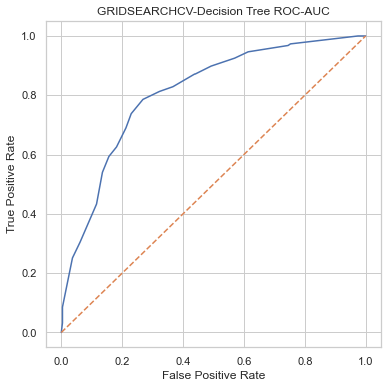

In [81]:
fpr,tpr,threshold=roc_curve(y_test,dtree_grid.predict_proba(X_test)[:,1], pos_label=1)
# plot AUC curve
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("GRIDSEARCHCV-Decision Tree ROC-AUC");

======= Classification Report GRIDSEARCH DecisionTree Classifier===============
              precision    recall  f1-score   support

           0       0.89      0.77      0.83       518
           1       0.54      0.74      0.62       187

    accuracy                           0.76       705
   macro avg       0.71      0.75      0.72       705
weighted avg       0.80      0.76      0.77       705



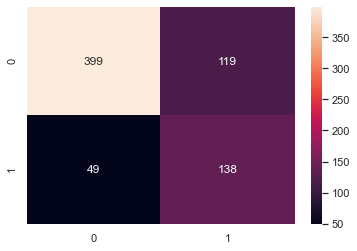

In [82]:
#we have got our Best estimator now i am predicting on unseen dataset to check the model accuracy
y_pred= dtree_grid.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f')
print("======= Classification Report GRIDSEARCH DecisionTree Classifier===============")
print(classification_report(y_test,y_pred))



- after fine tunning the hyperparameters of DecisionTree with randomunder sampling the recall and f1-score of majority class has a bit reduced from 80 and 82%  to 77 % and 83%  repectively
- the precision of minority class has a bit increased from 52% to 55% .its recal has increased from 55% to 79%
- Above i have modelled a Baseline Decisiontree Classifier and a DesicionTree Classifier using GridSearchCV on       
  data by undersampling it while maintaining the class proportion in every fold using StratifiedKFold 
- Model tunned after GridSearchCV is performing better than Baseline model.
- Our data is imbalanced thatswhy the recall of minority class is suffering
- number of minority class examples are too few for our model to learn decision boundary
- model has predicted 39 churns as No churn 
- Thus by data Balancing we can improve the recall and f1_score of minority class

### Selecting  Important features using Decision Tree Classifier

In [83]:
def important_features(model,df):
    important_features=pd.DataFrame(model.feature_importances_,columns=["Importance"],index=X_train.columns)
    s=important_features.loc[important_features["Importance"]==0].index.tolist()
    return df.drop(s,axis=1)

In [84]:
#droping the features which are not used in building the models
X=important_features(dtree_grid.best_estimator_._final_estimator,X)
X_test=important_features(dtree_grid.best_estimator_._final_estimator,X_test)

In [85]:
#traintestsplit after feature selection
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=.2,random_state=1,stratify=y)

# Ensemble


## 1 ) Baseline BaggingClassifier

In [86]:
#doing train test split on X_final which has selected features only
cv=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
base_estimator=DecisionTreeClassifier(criterion='entropy',max_depth=4,min_impurity_decrease=0.001, min_samples_leaf= 4,min_samples_split= 5)
bagging=BaggingClassifier(base_estimator=base_estimator,n_estimators=100,random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=4,
                                                        min_impurity_decrease=0.001,
                                                        min_samples_leaf=4,
                                                        min_samples_split=5),
                  n_estimators=100, random_state=1)

In [87]:
y_pred_bagg=bagging.predict(X_val)
y_pred_proba2=bagging.predict_proba(X_val)
print("Training Accuracy",bagging.score(X_train,y_train))
print("Test Accuracy",bagging.score(X_val,y_val))
print("Area under the curve",roc_auc_score(y_val,y_pred_proba2[:,1]))


Training Accuracy 0.7940828402366864
Test Accuracy 0.807570977917981
Area under the curve 0.8631253844658275


======= Classification Report Baseline Bagging Classifier===============
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       931
           1       0.71      0.47      0.56       337

    accuracy                           0.81      1268
   macro avg       0.77      0.70      0.72      1268
weighted avg       0.80      0.81      0.79      1268



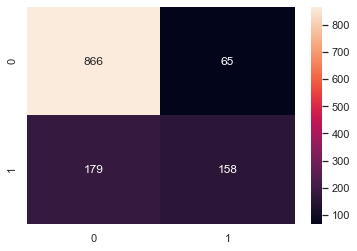

In [88]:
sns.heatmap(confusion_matrix(y_val,y_pred_bagg),annot=True,fmt='.0f')
print("======= Classification Report Baseline Bagging Classifier===============")
print(classification_report(y_val,y_pred_bagg))


- as our Class of interest is class 1 and it is evident that our model's recall and f1-score is lacking in predicting class 1
- the model is not performing good at classifying minority class
- compromised recall score of class 1 is a result of class imbalance.
- we will try to evaluate different variant of bagging classifier to check its performance on this imblanced data
- out of 931 who did not churn 852 were correctly classified as did not churn thus we got 92% recall for class 0. Out of 337 who did churn only 171 correctly predicted thus we got a recall of 49% for class 1 which is a large fraction of 337. So lets try to improve prediction using some data balancing

## 1.1)BalancedBaggingClassifier to handle data imbalance

### Evaluationg different variants of Balanced Bagging Calssifier using

    - RandomOverSampling then BalancedBagging
    - RandomUnderSampling then BalancedBagging
    - SMOTE then BalancedBagging

In [89]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_validate
from imblearn.pipeline import pipeline,make_pipeline
from imblearn.ensemble import BalancedBaggingClassifier
model1 = make_pipeline( SMOTE(),BalancedBaggingClassifier())
model2 = make_pipeline(RandomUnderSampler(),BalancedBaggingClassifier())
model3 = make_pipeline(RandomOverSampler(),BalancedBaggingClassifier())
model4 = make_pipeline(BaggingClassifier())

models=[model1,model2,model3,model4]
for model in models:
    cv_results = cross_validate(model, X, y, scoring="balanced_accuracy")

    print(f"{model}:{cv_results['test_score'].mean():.3f} +/- {cv_results['test_score'].std():.3f}")

Pipeline(steps=[('smote', SMOTE()),
                ('balancedbaggingclassifier', BalancedBaggingClassifier())]):0.690 +/- 0.022
Pipeline(steps=[('randomundersampler', RandomUnderSampler()),
                ('balancedbaggingclassifier', BalancedBaggingClassifier())]):0.731 +/- 0.011
Pipeline(steps=[('randomoversampler', RandomOverSampler()),
                ('balancedbaggingclassifier', BalancedBaggingClassifier())]):0.686 +/- 0.010
Pipeline(steps=[('baggingclassifier', BaggingClassifier())]):0.676 +/- 0.011


- from abaove evaluation results BalancedBagging with RandomUnderSampling is performing best among all the variant of our data with maximum test score and least standard deviation
- now we will create the final model using the best model got from above results

### Finetuning BalancedBaggingClassifier with randomundersampling By Doing Grid Search On Various Hyperparameters.

In [90]:
param_grid={
             "balancedbaggingclassifier__n_estimators":[20,50,100,500],
             "balancedbaggingclassifier__max_samples":[.1,.5,1.0],
             "balancedbaggingclassifier__max_features":[.1,.5,.1],
             "balancedbaggingclassifier__bootstrap_features":[True,False]
}
Balanced_bagg_grid=GridSearchCV(model2,param_grid=param_grid,cv=cv,scoring="balanced_accuracy")

In [91]:
Balanced_bagg_grid.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('randomundersampler',
                                        RandomUnderSampler()),
                                       ('balancedbaggingclassifier',
                                        BalancedBaggingClassifier())]),
             param_grid={'balancedbaggingclassifier__bootstrap_features': [True,
                                                                           False],
                         'balancedbaggingclassifier__max_features': [0.1, 0.5,
                                                                     0.1],
                         'balancedbaggingclassifier__max_samples': [0.1, 0.5,
                                                                    1.0],
                         'balancedbaggingclassifier__n_estimators': [20, 50,
                                                                     100,
                                      

## Predicting on unseen data


In [96]:
#we have got our Best estimator now i am predicting on unseen dataset to check the model accuracy
y_pred_bagg_grid=Balanced_bagg_grid.best_estimator_.predict(X_test)
print("Training Accuracy   ",Balanced_bagg_grid.score(X,y).round(3))
print("Test Accuracy       ",Balanced_bagg_grid.score(X_test,y_test).round(3))
print('Optimized Parameters:  {}'.format(Balanced_bagg_grid.best_params_))
print('Best Score from GridsearchCV parameters  {}'.format(Balanced_bagg_grid.best_score_.round(3)))

Training Accuracy    0.799
Test Accuracy        0.737
Optimized Parameters:  {'balancedbaggingclassifier__bootstrap_features': False, 'balancedbaggingclassifier__max_features': 0.5, 'balancedbaggingclassifier__max_samples': 0.1, 'balancedbaggingclassifier__n_estimators': 500}
Best Score from GridsearchCV parameters  0.773


In [97]:
Balanced_bagg_grid.best_params_

{'balancedbaggingclassifier__bootstrap_features': False,
 'balancedbaggingclassifier__max_features': 0.5,
 'balancedbaggingclassifier__max_samples': 0.1,
 'balancedbaggingclassifier__n_estimators': 500}

======= Classification ReportGRIDSEARCCV BalancedBaggingClassifier===============
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       518
           1       0.50      0.74      0.60       187

    accuracy                           0.73       705
   macro avg       0.69      0.74      0.70       705
weighted avg       0.78      0.73      0.75       705



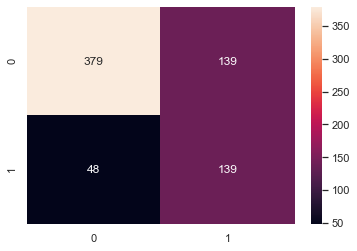

In [98]:

sns.heatmap(confusion_matrix(y_test,y_pred_bagg_grid),annot=True,fmt='.0f')
print("======= Classification ReportGRIDSEARCCV BalancedBaggingClassifier===============")
print(classification_report(y_test,y_pred_bagg_grid))



 ### ROC-AUC

Area Under the curve 0.817


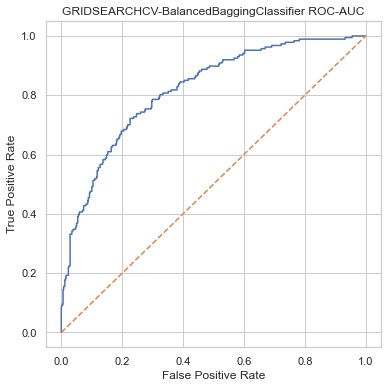

In [99]:
y_pred_proba3=Balanced_bagg_grid.predict_proba(X_test)
print("Area Under the curve",roc_auc_score(y_test,y_pred_proba3[:,1]).round(3))
fpr,tpr,threshold=roc_curve(y_test,Balanced_bagg_grid.predict_proba(X_test)[:,1], pos_label=1)
# plot AUC curve
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("GRIDSEARCHCV-BalancedBaggingClassifier ROC-AUC");

Our class of interest is class 1
  - thus we will report recall of label 1 
  - recall will tell us the fraction of relevant instances that were retrieved.
- Using BalancedBagging classifier along with RandomUnderSampling we are able to fetch a recal of 83% for class 1 
- More data needs to be collected to reduce class imbalance

In [202]:
with open("Balanced_bagg_grid.best_estimator_.pickle","wb")as file:
    pickle.dump(Balanced_bagg_grid.best_estimator_,file)

## 2) Baseline RandomforestClassifier

In [101]:
random_forest=RandomForestClassifier(random_state=7)
random_forest.fit(X_train,y_train)

RandomForestClassifier(random_state=7)

In [102]:
y_pred_random=random_forest.predict(X_val)
y_pred_proba4=random_forest.predict_proba(X_val)
print("Training Accuracy",random_forest.score(X_train,y_train))
print("Test Accuracy",random_forest.score(X_val,y_val))
print("Area under the curve",roc_auc_score(y_val,y_pred_proba4[:,1]))


Training Accuracy 0.9948717948717949
Test Accuracy 0.7839116719242902
Area under the curve 0.8291951795555017


===============Classification Report============
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       931
           1       0.62      0.50      0.55       337

    accuracy                           0.78      1268
   macro avg       0.72      0.69      0.70      1268
weighted avg       0.77      0.78      0.78      1268



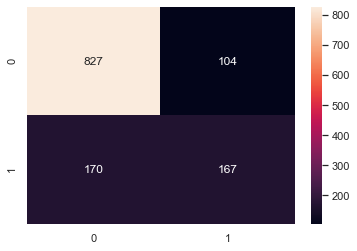

In [103]:
sns.heatmap(confusion_matrix(y_val,y_pred_random),annot=True,fmt='.0f')
print("===============Classification Report============")
print(classification_report(y_val,y_pred_random))

- as our Class of intrest is class 1 and it is evident that our model's recall and f1-score is lacking in predicting class 1
- the model is not performing good at classifiing minority class
- compromised recall score of class 1 is a result of class imbalance.
- we will try to evaluate different variant of bagging classifier to check its performance on this imblanced data
- out of 931 who did not churn 809 were correctly classified as did not churn thus we got 82% recall for class 0. Out of 337 who did churn only 161 are  correctly predicted thus we got a recall of 48% for class 1 which is a large fraction of 337.So lets try to improve prediction using some data balancing.

## 2.1)BalancedRandomClassifier to handle data imbalance

### Evaluationg different variants of Balanced Random Classifier using

    - RandomOverSampling then RandomForest
    - RandomUnderSampling then RandomForest
    - SMOTE then then RandomForest
    - BalancedRandomForestClassifier
    - RandomForestClassifier with class_weight="balanced" 
    - RandomForestClassifier with class_weight="balanced_subsample"
    

In [104]:
BalancedRandomForestClassifier

model1 = make_pipeline( SMOTE(),RandomForestClassifier(random_state=42, n_jobs=2))
model2 = make_pipeline(RandomForestClassifier(class_weight="balanced",random_state=42, n_jobs=2))
model3 = make_pipeline( RandomUnderSampler(random_state=42),RandomForestClassifier(random_state=42, n_jobs=2))
model4 = make_pipeline( BalancedRandomForestClassifier(class_weight="balanced",random_state=42, n_jobs=2))
model5 = make_pipeline(RandomForestClassifier(class_weight="balanced_subsample",random_state=42, n_jobs=2))
model6 = make_pipeline(SMOTE(),BalancedRandomForestClassifier(random_state=42, n_jobs=2))
models=[model1,model2,model3,model4,model5,model6]
for model in models:
    cv_results = cross_validate(model, X, y, scoring="balanced_accuracy")

    print(f"{model}:{cv_results['test_score'].mean():.3f} +/- {cv_results['test_score'].std():.3f}")

Pipeline(steps=[('smote', SMOTE()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_jobs=2, random_state=42))]):0.704 +/- 0.016
Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', n_jobs=2,
                                        random_state=42))]):0.690 +/- 0.010
Pipeline(steps=[('randomundersampler', RandomUnderSampler(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(n_jobs=2, random_state=42))]):0.743 +/- 0.010
Pipeline(steps=[('balancedrandomforestclassifier',
                 BalancedRandomForestClassifier(class_weight='balanced',
                                                n_jobs=2, random_state=42))]):0.758 +/- 0.007
Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        n_jobs=2, random_state=42))]):0.692 +/- 0.012
Pipeline(step

- from above evaluation results BalancedRandomClassifier is performing best among all the variant for our data with maximum test score and least standard deviation
- now we will create the final model using the best model got from above results

### Finetuning BalancedRandomForest Model By Doing Grid Search On Various Hyperparameters.

In [105]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 400, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True]
param_grid = {
               'balancedrandomforestclassifier__n_estimators': n_estimators,
               'balancedrandomforestclassifier__max_features': max_features,
               'balancedrandomforestclassifier__max_depth': max_depth,
               'balancedrandomforestclassifier__min_samples_split': min_samples_split,
               'balancedrandomforestclassifier__min_samples_leaf' : [1,2,4],
               'balancedrandomforestclassifier__bootstrap':[True],
               
             }
balanced_random_forest_grid=GridSearchCV(model4,param_grid=param_grid,scoring="balanced_accuracy",cv=cv,n_jobs=-1)

In [106]:
balanced_random_forest_grid.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('balancedrandomforestclassifier',
                                        BalancedRandomForestClassifier(class_weight='balanced',
                                                                       n_jobs=2,
                                                                       random_state=42))]),
             n_jobs=-1,
             param_grid={'balancedrandomforestclassifier__bootstrap': [True],
                         'balancedrandomforestclassifier__max_depth': [10, 20,
                                                                       30, 40,
                                                                       50,
                                                                       None],
                         'balancedrandomforestclassifier__max_features': ['sqrt',
                                                                          'log2'],
    

## Predicting on unseen data

In [107]:
y_pred_balanced_random_grid=balanced_random_forest_grid.predict(X_test)
print("Training Accuracy   ",balanced_random_forest_grid.score(X,y).round(3))
print("Test Accuracy       ",balanced_random_forest_grid.score(X_test,y_test).round(3))
print('Optimized Parameters:  {}'.format(balanced_random_forest_grid.best_params_))
print('Best Score from GridsearchCV parameters  {}'.format(balanced_random_forest_grid.best_score_.round(3)))

Training Accuracy    0.853
Test Accuracy        0.735
Optimized Parameters:  {'balancedrandomforestclassifier__bootstrap': True, 'balancedrandomforestclassifier__max_depth': 30, 'balancedrandomforestclassifier__max_features': 'sqrt', 'balancedrandomforestclassifier__min_samples_leaf': 2, 'balancedrandomforestclassifier__min_samples_split': 2, 'balancedrandomforestclassifier__n_estimators': 400}
Best Score from GridsearchCV parameters  0.766


===============Classification ReportBalanced Random Forest============
              precision    recall  f1-score   support

           0       0.91      0.64      0.75       518
           1       0.45      0.83      0.59       187

    accuracy                           0.69       705
   macro avg       0.68      0.73      0.67       705
weighted avg       0.79      0.69      0.71       705



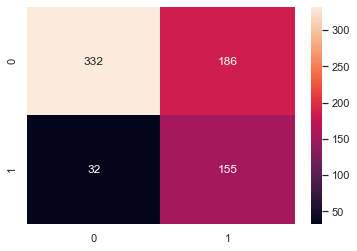

In [108]:
sns.heatmap(confusion_matrix(y_test,y_pred_balanced_random_grid),annot=True,fmt='.0f')
print("===============Classification ReportBalanced Random Forest============")
print(classification_report(y_test,y_pred_balanced_random_grid))


### ROC-AUC

Area under the curve    0.814


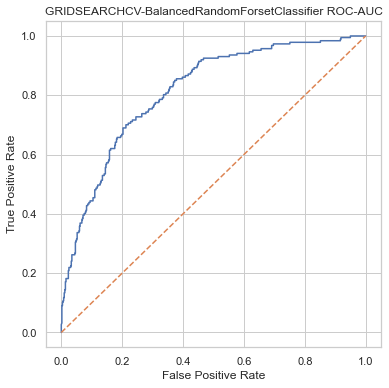

In [109]:
y_pred_proba5=balanced_random_forest_grid.predict_proba(X_test)
print("Area under the curve   ",roc_auc_score(y_test,y_pred_proba5[:,1]).round(3))
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba5[:,1], pos_label=1)
# plot AUC curve
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("GRIDSEARCHCV-BalancedRandomForsetClassifier ROC-AUC");

Our class of interest is class 1
  - thus we will report recall of label 1 
  - recall will tell us the fraction of relevant instances that were retrieved.
- Using BalancedRandom classifier along with RandomUnderSampling and class weight as balanced we are able to fetch a recal of 78% for class 1 but at the cost of depriciation in recall of class 0 which was 91% without undersampling
- More data needs to be collected to reduce class imbalance

## 3) Baseline ADABoost

In [110]:
ada_boost=AdaBoostClassifier(learning_rate=1)
ada_boost.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1)

In [111]:
y_pred_ada=ada_boost.predict(X_val)
y_pred_proba6=ada_boost.predict_proba(X_val)
print("Training Accuracy",ada_boost.score(X_train,y_train))
print("Test Accuracy",ada_boost.score(X_val,y_val))
print("Area Under the curve",roc_auc_score(y_val,y_pred_proba6[:,1]))

Training Accuracy 0.7974358974358975
Test Accuracy 0.8130914826498423
Area Under the curve 0.8706457750990448


===============Classification Report============
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       931
           1       0.69      0.53      0.60       337

    accuracy                           0.81      1268
   macro avg       0.77      0.72      0.74      1268
weighted avg       0.80      0.81      0.80      1268



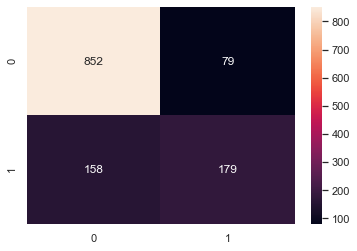

In [112]:
sns.heatmap(confusion_matrix(y_val,y_pred_ada),annot=True,fmt='.0f')
print("===============Classification Report============")
print(classification_report(y_val,y_pred_ada))

out of 931 who did not churn 836 were correctly classified as did not churn thus we got 91% recall for class 0. Out of 337 who did churn only 168 are correctly predicted thus we got a recall of 50% for class 1. So lets try to improve prediction using CrossValidation to optimize the parameters

## Fine tune Adaboost without balancing
- boosting algorithms works by adjusting the weights of incorrectly classified instances from previous classifier.these weights of incorrectly classified samples are adjusted such that subsequent classifiers focus more on difficult case. Thus Boosting algorithms performs better in classifying the dataset with imbalance than the other ensembles.
- so before doing any data balancing we will try to fine tune AdaBoost

In [113]:
param_grid={'n_estimators':[50,100,200,300,400,500],
             "learning_rate":[.1,.3,.5,.6,.8,1],
          
              }
ada_boost_grid=GridSearchCV(AdaBoostClassifier(random_state=7),param_grid=param_grid,cv=cv,scoring="balanced_accuracy",n_jobs=-1)

In [114]:
ada_boost_grid.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=AdaBoostClassifier(random_state=7), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.6, 0.8, 1],
                         'n_estimators': [50, 100, 200, 300, 400, 500]},
             scoring='balanced_accuracy')

## Predicting on unseen data

In [115]:
y_pred_ada_grid=ada_boost_grid.predict(X_test)
print("Training Accuracy       ",ada_boost_grid.score(X,y).round(3))
print("Test Accuracy           ",ada_boost_grid.score(X_test,y_test).round(3))
print('Optimized Parameters:  {}'.format(ada_boost_grid.best_params_))
print('Best Score from GridsearchCV parameters  {}'.format(ada_boost_grid.best_score_.round(3)))

Training Accuracy        0.722
Test Accuracy            0.7
Optimized Parameters:  {'learning_rate': 0.6, 'n_estimators': 200}
Best Score from GridsearchCV parameters  0.717


===============Classification ReportAdaBoosting Classifier============
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       518
           1       0.66      0.49      0.56       187

    accuracy                           0.80       705
   macro avg       0.74      0.70      0.72       705
weighted avg       0.79      0.80      0.79       705



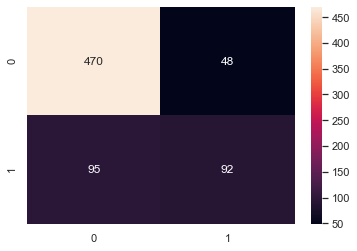

In [116]:
sns.heatmap(confusion_matrix(y_test,y_pred_ada_grid),annot=True,fmt='.0f')
print("===============Classification ReportAdaBoosting Classifier============")
print(classification_report(y_test,y_pred_ada_grid))

- as our Class of intrest is class 1 and it is evident that our model's recall and f1-score is lacking in predicting class 1
- though Baseline Adaboost classifier is performing better than baseline RandomForest and Bagging Classifier but this model is also not performing good at classifiing minority class
- compromised recall score of class 1 is a result of class imbalance.
- we will try to evaluate different variant of Adaboost classifier to check its performance on this imblanced data

## 3.1)AdaBoost Classifier to handle data imbalance
   ### Evaluating AdaBoost Classifier with different strategies of handling imbalanced data
        - SMOTE sampling and then AdaBoost,
        - RUS sampling and then AdaBoost
        - just Adaboost

In [117]:
from imblearn.ensemble import BalancedRandomForestClassifier

model1 = make_pipeline( SMOTE(),AdaBoostClassifier(random_state=42))
model2 = make_pipeline(AdaBoostClassifier(random_state=42))
model3 = make_pipeline( RandomUnderSampler(random_state=42),AdaBoostClassifier(random_state=42))
models=[model1,model2,model3]
for model in models:
    cv_results = cross_validate(model, X, y, scoring="balanced_accuracy")

    print(f"{model}:{cv_results['test_score'].mean():.3f} +/- {cv_results['test_score'].std():.3f}")

Pipeline(steps=[('smote', SMOTE()),
                ('adaboostclassifier', AdaBoostClassifier(random_state=42))]):0.758 +/- 0.008
Pipeline(steps=[('adaboostclassifier', AdaBoostClassifier(random_state=42))]):0.707 +/- 0.013
Pipeline(steps=[('randomundersampler', RandomUnderSampler(random_state=42)),
                ('adaboostclassifier', AdaBoostClassifier(random_state=42))]):0.772 +/- 0.005


- from above evaluation results AdaBoostClassifier with RandomUnderSampling is performing best among all the variant for our   data with maximum test score and least standard deviation
- now we will create the final model using the best model got from above results

In [118]:
param_grid={'adaboostclassifier__n_estimators':[50,100,200,300,400],
             "adaboostclassifier__learning_rate":[.1,.3,.5,.6,.8,1],
          
              }
balanced_ada_boost_grid=GridSearchCV(model3,param_grid=param_grid,cv=cv,scoring="balanced_accuracy",n_jobs=-1)

In [119]:
balanced_ada_boost_grid.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('randomundersampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('adaboostclassifier',
                                        AdaBoostClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'adaboostclassifier__learning_rate': [0.1, 0.3, 0.5,
                                                               0.6, 0.8, 1],
                         'adaboostclassifier__n_estimators': [50, 100, 200, 300,
                                                              400]},
             scoring='balanced_accuracy')

## predicting on unseen data

In [137]:
y_pred_balanced_ada_grid=balanced_ada_boost_grid.predict(X_test)
print("Training Accuracy      ",balanced_ada_boost_grid.score(X,y).round(3))
print("Test Accuracy          ",balanced_ada_boost_grid.score(X_test,y_test).round(3))
print('Optimized Parameters:  {}'.format(balanced_ada_boost_grid.best_params_))
print('Best Score from GridsearchCV parameters  {}'.format(balanced_ada_boost_grid.best_score_.round(3)))

Training Accuracy       0.778
Test Accuracy           0.737
Optimized Parameters:  {'adaboostclassifier__learning_rate': 0.1, 'adaboostclassifier__n_estimators': 200}
Best Score from GridsearchCV parameters  0.772


===============Classification Report Balanced AdaBoost============
              precision    recall  f1-score   support

           0       0.89      0.70      0.79       518
           1       0.48      0.77      0.60       187

    accuracy                           0.72       705
   macro avg       0.69      0.74      0.69       705
weighted avg       0.79      0.72      0.74       705



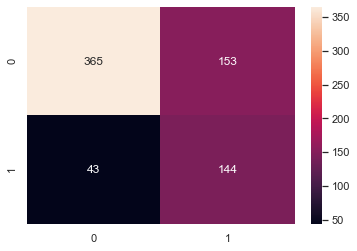

In [138]:
sns.heatmap(confusion_matrix(y_test,y_pred_balanced_ada_grid),annot=True,fmt='.0f')
print("===============Classification Report Balanced AdaBoost============")
print(classification_report(y_test,y_pred_balanced_ada_grid))


### ROC-AUC

Area under the curve 0.826


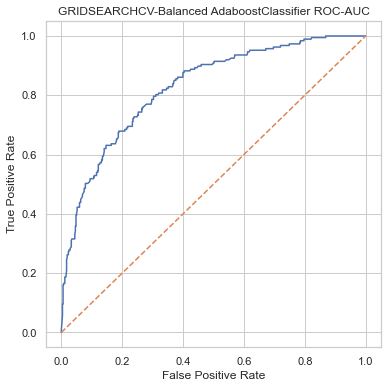

In [139]:
y_pred_proba7=balanced_ada_boost_grid.predict_proba(X_test)
print("Area under the curve",roc_auc_score(y_test,y_pred_proba7[:,1]).round(3))
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba7[:,1], pos_label=1)
# plot AUC curve
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("GRIDSEARCHCV-Balanced AdaboostClassifier ROC-AUC");

Our class of interest is class 1
  - thus we will report recall of label 1 
  - recall will tell us the fraction of relevant instances that were retrieved.
- Using AdaBoost along with RandomUnderSampling we are able to fetch a recal of 84% for class 1 but at the cost of depriciation in recall of class 0 which was 91% without undersampling
- this is slightly under performing than Balanced RandomForest
- More data needs to be collected to reduce class imbalance

In [465]:
with open("balanced_ada_boost_grid.best_estimator_.pickle","wb")as file:
    pickle.dump(balanced_ada_boost_grid.best_estimator_,file)

## 4) Baseline GradientBoostingClassifier

In [140]:
gradient_boost= GradientBoostingClassifier()
gradient_boost.fit(X_train,y_train)

GradientBoostingClassifier()

In [141]:
y_pred_grad=gradient_boost.predict(X_val)
print("Training Accuracy",gradient_boost.score(X_train,y_train).round(3))
print("Test Accuracy",gradient_boost.score(X_val,y_val).round(3))
print("Area Under the curve",roc_auc_score(y_val,gradient_boost.predict_proba(X_val)[:,1]).round(3))

Training Accuracy 0.823
Test Accuracy 0.815
Area Under the curve 0.871


===============Classification Report============
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       931
           1       0.69      0.55      0.61       337

    accuracy                           0.81      1268
   macro avg       0.77      0.73      0.74      1268
weighted avg       0.81      0.81      0.81      1268



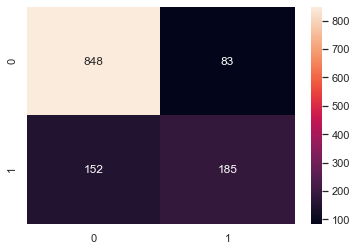

In [142]:
sns.heatmap(confusion_matrix(y_val,y_pred_grad),annot=True,fmt='.0f')
print("===============Classification Report============")
print(classification_report(y_val,y_pred_grad))

- out of 931 who did not churn 830 were correctly classified as did not churn thus we got 89% recall for class 0. Out of 337 who did churn only 176 correctly predicted thus we got a recall of 52% for class 1.Thus Baseline GradientBoost is not performing good in predicting class 1 and  our class of intreset is class 1. This is because of imbalance in our data.


## 4.1)GradientBoost Classifier to handle data imbalance
Evaluating GradientBoost Classifier with different strategies of handling imbalanced data

    - RandomUnderSampling
    - RandomOverSampling
    - SMOTE

In [143]:


model1 = make_pipeline( SMOTE(),GradientBoostingClassifier(random_state=42))
model2 = make_pipeline(GradientBoostingClassifier(random_state=42))
model3 = make_pipeline( RandomUnderSampler(random_state=42),GradientBoostingClassifier(random_state=42))
model4 = make_pipeline( RandomOverSampler(random_state=42),GradientBoostingClassifier(random_state=42))
models=[model1,model2,model3,model4]
for model in models:
    cv_results = cross_validate(model, X, y, scoring="balanced_accuracy")

    print(f"{model}:{cv_results['test_score'].mean():.3f} +/- {cv_results['test_score'].std():.3f}")

Pipeline(steps=[('smote', SMOTE()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))]):0.750 +/- 0.008
Pipeline(steps=[('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))]):0.715 +/- 0.007
Pipeline(steps=[('randomundersampler', RandomUnderSampler(random_state=42)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))]):0.772 +/- 0.008
Pipeline(steps=[('randomoversampler', RandomOverSampler(random_state=42)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))]):0.770 +/- 0.004


- from above evaluation results GradientBoostingClassifier with RandomOverSampling is performing best among all the variant for our   data with maximum test score and least standard deviation
- now we will create the final model using the best model got from above results

### lets try to improve prediction using CrossValidation to optimize the parameters of the best model got from above results

In [144]:



param_grid={
             'gradientboostingclassifier__n_estimators':[100,200,300],
             'gradientboostingclassifier__learning_rate':[.01,0.1,.05], 
             'gradientboostingclassifier__min_samples_split':[400, 600, 800, 1000],
             'gradientboostingclassifier__min_samples_leaf':[30, 40, 50],
             'gradientboostingclassifier__max_depth':[5, 7, 9, 10],
             'gradientboostingclassifier__max_features':['sqrt'], 
             'gradientboostingclassifier__subsample':[0.7,0.8, 0.9]
    
}
balanced_gradient_boost=GridSearchCV(model4,param_grid=param_grid,cv=cv,scoring="balanced_accuracy",n_jobs=-1)

In [145]:
balanced_gradient_boost.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('randomoversampler',
                                        RandomOverSampler(random_state=42)),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__learning_rate': [0.01,
                                                                       0.1,
                                                                       0.05],
                         'gradientboostingclassifier__max_depth': [5, 7, 9, 10],
                         'gradientboostingclassifier__max_features': ['sqrt'],
                         'gradientboostingclassifier__min_samples_leaf': [30,
                                                                          40,
                                                          

## Predicting on unseen data

In [146]:
y_pred_balanced_grad=balanced_gradient_boost.predict(X_test)

print("Training Accuracy        ",balanced_gradient_boost.score(X,y).round(3))
print("Test Accuracy            ",balanced_gradient_boost.score(X_test,y_test).round(3))
print('Optimized Parameters:     {}'.format(balanced_gradient_boost.best_params_))
print('Best Score from GridsearchCV parameters  {}'.format(balanced_gradient_boost.best_score_.round(3)))

Training Accuracy         0.793
Test Accuracy             0.751
Optimized Parameters:     {'gradientboostingclassifier__learning_rate': 0.01, 'gradientboostingclassifier__max_depth': 9, 'gradientboostingclassifier__max_features': 'sqrt', 'gradientboostingclassifier__min_samples_leaf': 40, 'gradientboostingclassifier__min_samples_split': 400, 'gradientboostingclassifier__n_estimators': 300, 'gradientboostingclassifier__subsample': 0.9}
Best Score from GridsearchCV parameters  0.777


===============Classification Report Balanced Gradient Boosting Classifier============
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       518
           1       0.53      0.74      0.62       187

    accuracy                           0.75       705
   macro avg       0.71      0.75      0.72       705
weighted avg       0.79      0.75      0.77       705



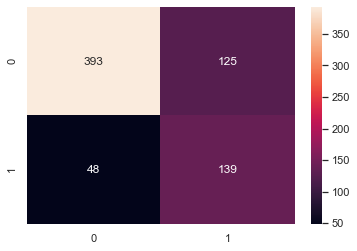

In [147]:
sns.heatmap(confusion_matrix(y_test,y_pred_balanced_grad),annot=True,fmt='.0f')
print("===============Classification Report Balanced Gradient Boosting Classifier============")
print(classification_report(y_test,y_pred_balanced_grad))



### ROC-AUC

Area under the curve      0.817


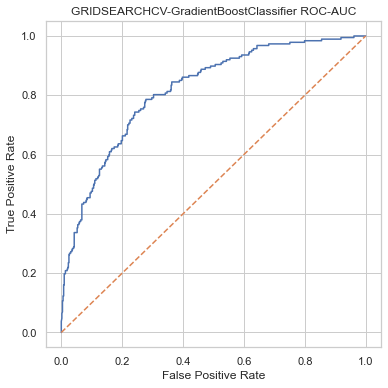

In [148]:
y_pred_proba8=balanced_gradient_boost.predict_proba(X_test)
print("Area under the curve     ",roc_auc_score(y_test,y_pred_proba8[:,1]).round(3))
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba8[:,1], pos_label=1)
# plot AUC curve
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("GRIDSEARCHCV-GradientBoostClassifier ROC-AUC");

 Our class of interest is class 1
  - thus we will report recall of label 1 
  - recall will tell us the fraction of relevant instances that were retrieved.
- Using GradientBoosting classifier along with RandomUnderSampling we are able to fetch a recal of 80% for class 1 but at the cost of depriciation in recall of class 0 which was 89% without undersampling
- More data needs to be collected to reduce class imbalance

In [466]:
with open("balanced_gradient_boost.best_estimator_.pickle","wb")as file:
    pickle.dump(balanced_gradient_boost.best_estimator_,file)

## 5) XGBoosting Classifier
- to handel data imbalance XGBoost Classigfier has a parameter scale_pos_weight.
- Generally, scale_pos_weight is the ratio of number of negative class to the positive class.
- Suppose, the dataset has 90 observations of negative class and 10 observations of positive class, then ideal value of scale_pos_weight should be 9.

In [159]:
XG_boost=XGBClassifier(objective="binary:logistic",max_depth=5,min_child_weight=3,scale_pos_weight=3,subsample=1, colsample_bytree = .5,nthread=4,random_state=7 )

In [160]:
XG_boost.fit(X_train,y_train,early_stopping_rounds=10,eval_metric=['error'],eval_set=[(X_val,y_val)])

[0]	validation_0-error:0.28549
[1]	validation_0-error:0.29574
[2]	validation_0-error:0.26104
[3]	validation_0-error:0.27918
[4]	validation_0-error:0.26498
[5]	validation_0-error:0.24763
[6]	validation_0-error:0.25079
[7]	validation_0-error:0.25158
[8]	validation_0-error:0.24685
[9]	validation_0-error:0.24842
[10]	validation_0-error:0.24369
[11]	validation_0-error:0.23975
[12]	validation_0-error:0.23738
[13]	validation_0-error:0.23975
[14]	validation_0-error:0.23580
[15]	validation_0-error:0.23659
[16]	validation_0-error:0.24133
[17]	validation_0-error:0.24290
[18]	validation_0-error:0.24290
[19]	validation_0-error:0.23896
[20]	validation_0-error:0.23817
[21]	validation_0-error:0.24133
[22]	validation_0-error:0.23817
[23]	validation_0-error:0.24133


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=7, reg_alpha=0, reg_lambda=1, scale_pos_weight=3,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [161]:
y_pred_XGB=XG_boost.predict(X_val)

In [162]:
print("Training Accuracy",XG_boost.score(X_train,y_train).round(3))
print("Test Accuracy",XG_boost.score(X_val,y_val).round(3))
print("Area Under the curve",roc_auc_score(y_val,XG_boost.predict_proba(X_val)[:,1]).round(3))

Training Accuracy 0.77
Test Accuracy 0.764
Area Under the curve 0.866


===============Classification Report============
              precision    recall  f1-score   support

           0       0.93      0.74      0.82       931
           1       0.54      0.84      0.65       337

    accuracy                           0.76      1268
   macro avg       0.73      0.79      0.74      1268
weighted avg       0.82      0.76      0.78      1268



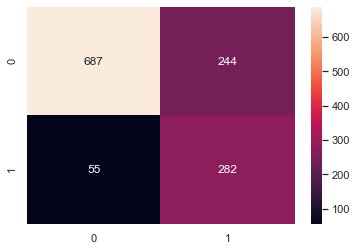

In [163]:
sns.heatmap(confusion_matrix(y_val,y_pred_XGB),annot=True,fmt='.0f')
print("===============Classification Report============")
print(classification_report(y_val,y_pred_XGB))

- out of 931 who did not churn 689 were correctly classified as did not churn thus we got 74% recall for class 0. Out of 337 who did churn 282 correctly predicted thus we got a recall of 79% for class 1.Thus XGBoost is performing good in predicting class 1 and  our class of intreset is class 1.We will try to tune its parameters to see if its performance is increasing or not.XGBoost has a parameter scale_pos_weight that helps with imbalanced data. So lets try to improve prediction using CrossValidation to optimize the parameters

## Fine tuning XGBoost Classifier using GridSearchCV

In [164]:
from sklearn.model_selection import GridSearchCV
param_grid={
              'objective':["binary:logistic"],        
              "max_depth":[3,4,5],
              "learning_rate":[0.1,.01,.05,],
              "gamma":[0,.25,1.0],
              "reg_lambda":[0,1,10],
              "scale_pos_weight":[1,2,3],
              'min_child_weight':range(1,6,2)
           }
XG_boost_grid=GridSearchCV(XG_boost,param_grid=param_grid,scoring="balanced_accuracy",cv=cv,n_jobs=-1)
                    

In [165]:
XG_boost_grid.fit(X,y)

[20:56:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.5, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=5,
                                     min_child_weight=3, missing=nan,
                                     monotone...
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=3, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                                     verbosity=None),
             n_jobs=-1,
             param_grid={'g

## Predicting  on unseen data

In [166]:
y_pred_XGB_grid=XG_boost_grid.predict(X_test)
print("Training Accuracy        ",XG_boost_grid.score(X,y).round(3))
print("Test Accuracy            ",XG_boost_grid.score(X_test,y_test).round(3))
print('Optimized Parameters:     {}'.format(XG_boost_grid.best_params_))
print('Best Score from GridsearchCV parameters  {}'.format(XG_boost_grid.best_score_.round(3)))

Training Accuracy         0.79
Test Accuracy             0.749
Optimized Parameters:     {'gamma': 0.25, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 1, 'objective': 'binary:logistic', 'reg_lambda': 10, 'scale_pos_weight': 3}
Best Score from GridsearchCV parameters  0.778


===============Classification Report============
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       518
           1       0.50      0.78      0.61       187

    accuracy                           0.73       705
   macro avg       0.70      0.75      0.70       705
weighted avg       0.79      0.73      0.75       705



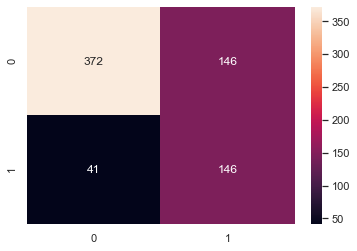

In [167]:
sns.heatmap(confusion_matrix(y_test,y_pred_XGB_grid),annot=True,fmt='.0f')
print("===============Classification Report============")
print(classification_report(y_test,y_pred_XGB_grid))



### ROC-AUC

Area under the curve      0.821


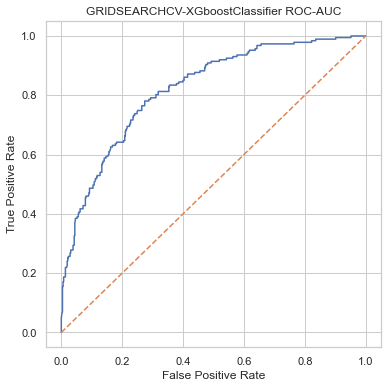

In [158]:
y_pred_proba9=XG_boost_grid.predict_proba(X_test)
print("Area under the curve     ",roc_auc_score(y_test,y_pred_proba9[:,1]).round(3))
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba9[:,1], pos_label=1)
# plot AUC curve
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("GRIDSEARCHCV-XGboostClassifier ROC-AUC");

- The motive of building this model is to identify the potential customers who have a higher probability to churn. 
- Our class of interest is class 1
  - thus we will report recall of label 1 
  - recall will tell us the fraction of relevant instances that were retrieved.
- Using XGBoost classifier we are able to fetch a recal of 86% for class 1 but at the cost of depriciation in recall of    
  class 0
- I have used scale_pos_weight hyperparameter of XGBoost classifier to handle class imbalance.
- More data needs to be collected to reduce class imbalance

## Evaluating Model Performances

In [194]:
cv1=StratifiedKFold(n_splits=10,random_state=7)
models = [('BALANCED_BAGGING', Balanced_bagg_grid.best_estimator_),
          ('BALANCED_RF', balanced_random_forest_grid.best_estimator_),
          ('ADABOOST', balanced_ada_boost_grid.best_estimator_),        
          ('GRADIENTBOOST', balanced_gradient_boost.best_estimator_),
          ('XGB', XG_boost_grid.best_estimator_)
         ]
def performance_summary(models,X,y):    
    results = []
    names = [] 
    target_names = ['No Churn', 'Churn']
    for name,model in models:
        cv_results = cross_validate(model, X, y,cv=10, scoring="balanced_accuracy")
        results.append(cv_results['test_score'])
        names.append(name)
        print(f"{name}:{cv_results['test_score'].mean():.3f} +/- {cv_results['test_score'].std():.3f}")
        
    # boxplot algorithm comparison
    fig= plt.figure(figsize=(12, 8))
    sns.set(font_scale=1.3)
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    

BALANCED_BAGGING:0.739 +/- 0.041
BALANCED_RF:0.712 +/- 0.039
ADABOOST:0.705 +/- 0.050
GRADIENTBOOST:0.728 +/- 0.045
[21:22:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:22:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:22:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metr

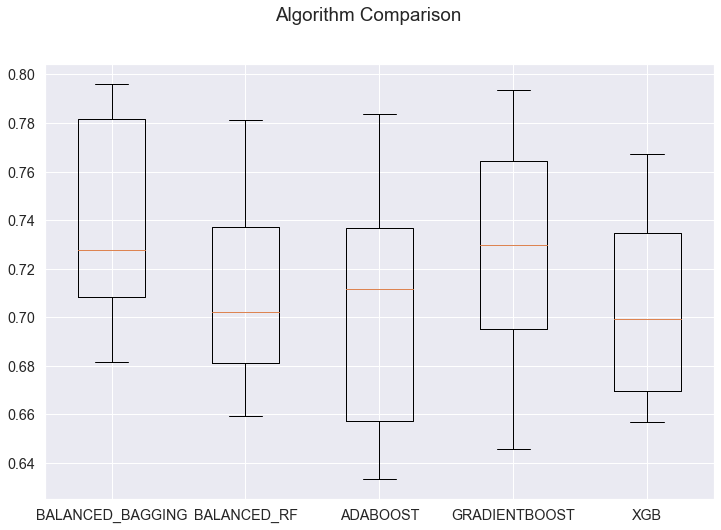

In [195]:
performance_summary(models,X_test,y_test)

In [196]:
def score_summary(models,X,y):    
    results = []
    names = []
    dfs=[]
    scoring = ['balanced_accuracy', 'precision', 'recall', 'f1', 'roc_auc']    
    target_names = ['No Churn', 'Churn']
    for name,model in models:
        kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
        cv_results = cross_validate(model, X, y, scoring=scoring)
        y_pred = model.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
        final = pd.concat(dfs)
    return final
    


In [197]:
final=score_summary(models,X,y)

BALANCED_BAGGING
              precision    recall  f1-score   support

    No Churn       0.89      0.73      0.80       518
       Churn       0.50      0.74      0.60       187

    accuracy                           0.73       705
   macro avg       0.69      0.74      0.70       705
weighted avg       0.78      0.73      0.75       705

BALANCED_RF
              precision    recall  f1-score   support

    No Churn       0.91      0.64      0.75       518
       Churn       0.45      0.83      0.59       187

    accuracy                           0.69       705
   macro avg       0.68      0.73      0.67       705
weighted avg       0.79      0.69      0.71       705

ADABOOST
              precision    recall  f1-score   support

    No Churn       0.89      0.70      0.79       518
       Churn       0.48      0.77      0.60       187

    accuracy                           0.72       705
   macro avg       0.69      0.74      0.69       705
weighted avg       0.79      0.72   

## ploting fit time and Score time
- To obtain better estimates of the distribution of metrics from each model, I run empirical bootstrapping at 100 samples. 

In [198]:
bootstraps = []
for model in list(set(final["model"].values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=100, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
# fit time metrics
time_metrics = ['fit_time','score_time'] 
## TIME METRICS
# df with fit data
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)]
results_long_fit = results_long_fit.sort_values(by='values')

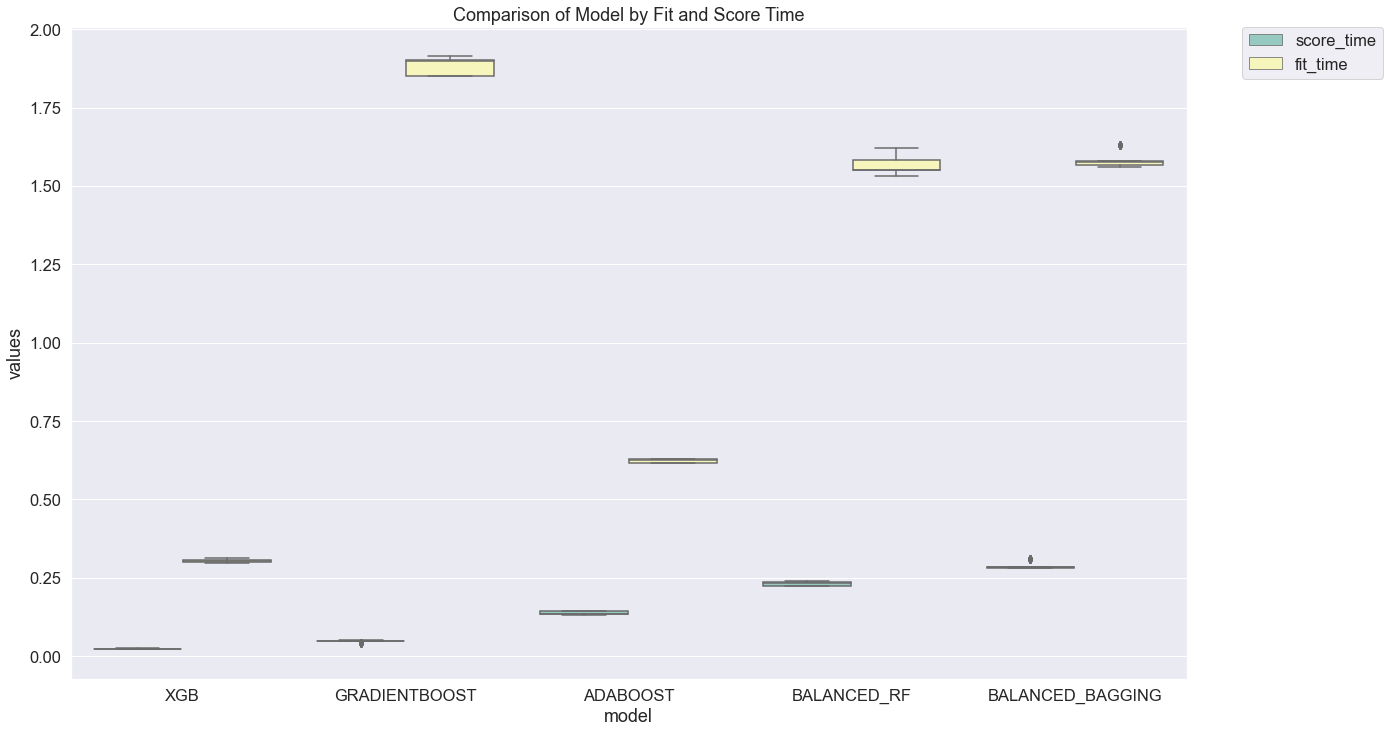

In [199]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=1.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
plt.savefig('./benchmark_models_time.png',dpi=300)

Above results, would suggest that bothBalancedRandomForest and XGBoost are perhaps worthy of further study on this problem.But looking at  above plots and score values the best performing model is XGBoost. If we look at the fit time and score time plots  above both the score time and the fit time of XGB is least. Further the maximum recall on unseen data is 86% which is given by both the BalancedRandomForest but fit time of BalancedRandomForest is quite high as compared to XGBoost. Going by the final values of recall our final model for prediction will be RandomForest Classifier 

### Pickle RandomForest Classifier

In [203]:
with open("balanced_random_forest_grid.best_estimator_.pickle","wb")as file:
    pickle.dump(balanced_random_forest_grid.best_estimator_,file)

In [243]:
#app window
win=tk.Tk()

win.configure(background="light green")
win.title("CLASSIFIER GUI-Great Learning")

tit = tk.Label(win, text="CLASSIFIER GUI-Great Learning",padx=25, pady=6,  font=("", 12),anchor="center").grid(row=0,column=8)

#Column 1 
gender=ttk.Label(win,text="Gender",width=20,relief="solid",font=("", 12),anchor="center")
gender.grid(column = 4,row = 4, padx = 1, pady = 1) 
var1 = tk.StringVar() 
genderchoosen = ttk.Combobox(win, width = 27, textvariable = var1)
# Adding combobox drop down list 
genderchoosen['values'] = ('Male','Female')
genderchoosen.grid(row=4,column=5)
genderchoosen.current(0)


#Column 2 
SeniorCitizen=ttk.Label(win,text="Senior Citizen",width=20,relief="solid",font=("", 12),anchor="center")
SeniorCitizen.grid(column = 4,row = 5, padx = 1, pady = 1) 
var2 = tk.StringVar() 
SeniorCitizenchoosen = ttk.Combobox(win, width = 27, textvariable = var2)
# Adding combobox drop down list 
SeniorCitizenchoosen['values'] = ('Yes','No')
SeniorCitizenchoosen.grid(row=5,column=5)
SeniorCitizenchoosen.current(0)


#Column 3 
Partner=ttk.Label(win,text="Partner",width=20,relief="solid",font=("", 12),anchor="center")
Partner.grid(column = 4,row = 6, padx = 1, pady = 1) 
var3 = tk.StringVar() 
Partnerchoosen = ttk.Combobox(win, width = 27, textvariable = var3)
# Adding combobox drop down list 
Partnerchoosen['values'] = ('Yes','No')
Partnerchoosen.grid(row=6,column=5)
Partnerchoosen.current(0)

#Column 4 
Dependents=ttk.Label(win,text="Dependents",width=20,relief="solid",font=("", 12),anchor="center")
Dependents.grid(column = 4,row = 7, padx = 1, pady = 1) 
var4 = tk.StringVar() 
Dependentschoosen = ttk.Combobox(win, width = 27, textvariable = var4)
# Adding combobox drop down list 
Dependentschoosen['values'] = ('Yes','No')
Dependentschoosen.grid(row=7,column=5)
Dependentschoosen.current(0)
#column5
tenure=ttk.Label(win,text="Tenure",width=20,relief="solid",font=("", 12),anchor="center")
tenure.grid(column = 4,row = 8, padx = 1, pady = 1)
var5 = tk.IntVar()
tenureentry=ttk.Entry(win,width=30,textvariable=var5)
tenureentry.grid(row=8,column=5)
#Column 6
PhoneServices=ttk.Label(win,text="PhoneServices",width=20,relief="solid",font=("", 12),anchor="center")
PhoneServices.grid(column = 4,row = 9, padx = 1, pady = 1) 
var6 = tk.StringVar() 
PhoneServiceschoosen = ttk.Combobox(win, width = 27, textvariable = var6)
# Adding combobox drop down list 
PhoneServiceschoosen['values'] = ('Yes','No')
PhoneServiceschoosen.grid(row=9,column=5)
PhoneServiceschoosen.current(0)
#column7
MultipleLines=ttk.Label(win,text="MultipleLines",width=20,relief="solid",font=("", 12),anchor="center")
MultipleLines.grid(column = 4,row = 10, padx = 1, pady = 1) 
var7 = tk.StringVar() 
MultipleLineschoosen = ttk.Combobox(win, width = 27, textvariable = var7)
# Adding combobox drop down list 
MultipleLineschoosen['values'] = ('Yes','No',"No_phone_service")
MultipleLineschoosen.grid(row=10,column=5)
MultipleLineschoosen.current(0)
#column8
InternetService=ttk.Label(win,text="InternetService",width=20,relief="solid",font=("", 12),anchor="center")
InternetService.grid(column = 4,row = 11, padx = 1, pady = 1) 
var8 = tk.StringVar() 
InternetServicechoosen = ttk.Combobox(win, width = 27, textvariable = var8)
# Adding combobox drop down list 
InternetServicechoosen['values'] = ('DSL','No',"Fiber_optic")
InternetServicechoosen.grid(row=11,column=5)
InternetServicechoosen.current(0)
#column9
OnlineSecurity=ttk.Label(win,text="OnlineSecurity",width=20,relief="solid",font=("", 12),anchor="center")
OnlineSecurity.grid(column = 4,row = 12, padx = 1, pady = 1) 
var9 = tk.StringVar() 
OnlineSecuritychoosen = ttk.Combobox(win, width = 27, textvariable = var9)
# Adding combobox drop down list 
OnlineSecuritychoosen['values'] = ('Yes','No',"No_internet_service")
OnlineSecuritychoosen.grid(row=12,column=5)
OnlineSecuritychoosen.current(0)
#column10
OnlineBackup=ttk.Label(win,text="OnlineBackup",width=20,relief="solid",font=("", 12),anchor="center")
OnlineBackup.grid(column = 4,row = 13, padx = 1, pady = 1) 
var10 = tk.StringVar() 
OnlineBackupchoosen = ttk.Combobox(win, width = 27, textvariable = var10)
# Adding combobox drop down list 
OnlineBackupchoosen['values'] = ('Yes','No',"No_internet_service")
OnlineBackupchoosen.grid(row=13,column=5)
OnlineBackupchoosen.current(0)
#column11
DeviceProtection=ttk.Label(win,text="DeviceProtection",width=20,relief="solid",font=("", 12),anchor="center")
DeviceProtection.grid(column = 4,row = 14, padx = 1, pady = 1) 
var11 = tk.StringVar() 
DeviceProtectionchoosen = ttk.Combobox(win, width = 27, textvariable = var11)
# Adding combobox drop down list 
DeviceProtectionchoosen['values'] = ('Yes','No',"No_internet_service")
DeviceProtectionchoosen.grid(row=14,column=5)
DeviceProtectionchoosen.current(0)
#column12
TechSupport=ttk.Label(win,text="TechSupport",width=20,relief="solid",font=("", 12),anchor="center")
TechSupport.grid(column = 4,row = 15, padx = 1, pady = 1) 
var12 = tk.StringVar() 
TechSupportchoosen = ttk.Combobox(win, width = 27, textvariable = var12)
# Adding combobox drop down list 
TechSupportchoosen['values'] = ('Yes','No',"No_internet_service")
TechSupportchoosen.grid(row=15,column=5)
TechSupportchoosen.current(0)
#column13
StreamingTV=ttk.Label(win,text="StreamingTV",width=20,relief="solid",font=("", 12),anchor="center")
StreamingTV.grid(column = 4,row = 16, padx = 1, pady = 1) 
var13 = tk.StringVar() 
StreamingTVchoosen = ttk.Combobox(win, width = 27, textvariable = var13)
# Adding combobox drop down list 
StreamingTVchoosen['values'] = ('Yes','No',"No_internet_service")
StreamingTVchoosen.grid(row=16,column=5)
StreamingTVchoosen.current(0)
#column14
StreamingMovies=ttk.Label(win,text="StreamingMovies",width=20,relief="solid",font=("", 12),anchor="center")
StreamingMovies.grid(column = 4,row = 17, padx = 1, pady = 1) 
var14 = tk.StringVar() 
StreamingMovieschoosen = ttk.Combobox(win, width = 27, textvariable = var14)
# Adding combobox drop down list 
StreamingMovieschoosen['values'] = ('Yes','No',"No_internet_service")
StreamingMovieschoosen.grid(row=17,column=5)
StreamingMovieschoosen.current(0)
#column15
Contract=ttk.Label(win,text="DeviceProtection",width=20,relief="solid",font=("", 12),anchor="center")
Contract.grid(column = 4,row = 18, padx = 1, pady = 1) 
var15 = tk.StringVar() 
Contractchoosen = ttk.Combobox(win, width = 27, textvariable = var15)
# Adding combobox drop down list 
Contractchoosen['values'] = ('Month-to-month','One_year',"Two_year")
Contractchoosen.grid(row=18,column=5)
Contractchoosen.current(0)
#column16
PaperlessBilling=ttk.Label(win,text="PaperlessBilling",width=20,relief="solid",font=("", 12),anchor="center")
PaperlessBilling.grid(column = 4,row = 19, padx = 1, pady = 1) 
var16 = tk.StringVar() 
PaperlessBillingchoosen = ttk.Combobox(win, width = 27, textvariable = var16)
# Adding combobox drop down list 
PaperlessBillingchoosen['values'] = ('Yes','No')
PaperlessBillingchoosen.grid(row=19,column=5)
PaperlessBillingchoosen.current(0)
#column17
PaymentMethod=ttk.Label(win,text="PaymentMethod",width=20,relief="solid",font=("", 12),anchor="center")
PaymentMethod.grid(column = 4,row = 20, padx = 1, pady = 1) 
var17 = tk.StringVar() 
PaymentMethodchoosen = ttk.Combobox(win, width = 27, textvariable = var17)
# Adding combobox drop down list 
PaymentMethodchoosen['values'] = ('Electronic_check','Mailed_check',"Bank_transfer_(automatic)","Credit_card_(automatic)")
PaymentMethodchoosen.grid(row=20,column=5)
PaymentMethodchoosen.current(0)
#column18
MonthlyCharges=ttk.Label(win,text="MonthlyCharges",width=20,relief="solid",font=("", 12),anchor="center")
MonthlyCharges.grid(column = 4,row = 21, padx = 1, pady = 1) 
var18 = tk.IntVar() 
# Adding combobox drop down list 
MonthlyChargesentry=ttk.Entry(win,width=30,textvariable=var18)
MonthlyChargesentry.grid(row=21,column=5)

#column19
TotalCharges=ttk.Label(win,text="Total Charges",width=20,relief="solid",font=("", 12),anchor="center")
TotalCharges.grid(column = 4,row = 22, padx = 1, pady = 1) 
var19 = tk.IntVar() 
# Adding combobox drop down list 
TotalChargesentry=ttk.Entry(win,width=30,textvariable=var19)
TotalChargesentry.grid(row=22,column=5)

Submit =tk.Button(win,text ="Submit" ,relief="groove",width = 18,font=("", 12),anchor="center",bg="light blue",command = action)
Submit.grid(row=30,column=4,padx=8,pady=8)
confirm="Submit sucessful"
confirm_entrybox=ttk.Entry(win,width=30)
confirm_entrybox.grid(row=30,column=5)
#predict
Predict =tk.Button(win,text ="Predict" ,relief="groove",font=("", 11),anchor="center",bg="light blue",width = 19,height=1,command = output)
Predict.grid(row=31,column=4)
predict_entrybox=ttk.Entry(win,width=30)
predict_entrybox.grid(row=31,column=5)

win.mainloop()

We have now created all the labels,comboboxes and entry boxes that are mainly the features that will store the new data point values. When we have to compute prediction using any model we need a data frame on which we have to make the prediction. Once a user enters a different set of values we then have to create a data frame of it. Lets create a Dataframe out of it

In [242]:

def action():
    global DS
    
    DF = pd.DataFrame(columns=['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService',
                               'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                               'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod',
                               'MonthlyCharges','TotalCharges'])
    gender=var1.get()
    DF.loc[0,'gender']=gender
    SeniorCitizen=var2.get()
    DF.loc[0,'SeniorCitizen']=SeniorCitizen
    Partner=var3.get()
    DF.loc[0,'Partner']=Partner
    Dependents=var4.get()
    DF.loc[0,'Dependents']=Dependents
    tenure=int(var5.get())
    DF.loc[0,'tenure']=int(tenure)
    DF["tenure"]=DF["tenure"].astype("float")
    PhoneService=var6.get()
    DF.loc[0,'PhoneService']=PhoneService
    MultipleLines=var7.get()
    DF.loc[0,'MultipleLines']=MultipleLines
    InternetService=var8.get()
    DF.loc[0,'InternetService']=InternetService
    OnlineSecurity=var9.get()
    DF.loc[0,'OnlineSecurity']=OnlineSecurity
    OnlineBackup=var10.get()
    DF.loc[0,'OnlineBackup']=OnlineBackup
    DeviceProtection=var11.get()
    DF.loc[0,'DeviceProtection']=DeviceProtection
    TechSupport=var12.get()
    DF.loc[0,'TechSupport']=TechSupport
    StreamingTV=var13.get()
    DF.loc[0,'StreamingTV']=StreamingTV
    StreamingMovies=var14.get()
    DF.loc[0,'StreamingMovies']=StreamingMovies
    Contract=var15.get()
    DF.loc[0,'Contract']=Contract
    PaperlessBilling=var16.get()
    DF.loc[0,'PaperlessBilling']=PaperlessBilling
    PaymentMethod=var17.get()
    DF.loc[0,'PaymentMethod']=PaymentMethod
    MonthlyCharges=var18.get()
    DF.loc[0,'MonthlyCharges']=int(MonthlyCharges)
    DF["MonthlyCharges"]=DF["MonthlyCharges"].astype("float")
    TotalCharges=var19.get()
    DF.loc[0,'TotalCharges']=int(TotalCharges)
    DF["TotalCharges"]=DF["TotalCharges"].astype("float")
    confirm_entrybox.insert(1,str(confirm))
    DS=DF
    transform(DS)


In [240]:
def output():
    with open("balanced_random_forest_grid.best_estimator_.pickle", "rb") as file:
        model_rbf = pickle.load(file) 
    predicted=model_rbf.predict(predict_df)
    
    if predicted==1:
        predict_entrybox.insert(1,str('Yes'))
    elif predicted==0:
        predict_entrybox.insert(1,str('No'))
        


In [244]:

def transform(df):
    global predict_df
      
    df['MultipleLines_No_phone_service']=(df['MultipleLines']=='No_phone_service')*1
    df['InternetService_Fiber_optic']=(df['InternetService']=='Fiber_optic')*1
    df['OnlineBackup_No']=(df['OnlineBackup']=='No')*1
    df['TechSupport_No']=(df['TechSupport']=='No')*1
    df['TechSupport_Yes']=(df['TechSupport']=='Yes')*1
    
    df['StreamingMovies_Yes']=(df['StreamingMovies']=='Yes')*1      
    
    df['Contract_Month-to-month']=(df['Contract']=='Month-to-month')*1
    df['Contract_One_year']=(df['Contract']=='Two_year')*1
    df['PaperlessBilling_Yes']=(df['PaperlessBilling']=='Yes')*1
     
    df['PaymentMethod_Electronic_check']=(df['PaymentMethod']=='Electronic_check')*1
      
    for col in df.columns:
        if col not in X.columns:
            df.drop([col],axis=1,inplace=True)
    predict_df=df
    
    


### Conclusion

- Gender and PhoneServices has  has negligible effect on Predicting Target Variable
- model gives a fair recall score of 86% as well for label 1 which will help us predict the customer churn effectively 
- RandomForset with classweight as"Balanced" and XGBoost has overall good accuracy score and AUC as well 
- Best roc_auc: 85.9
- Data have no missing values but few inconsistenciesc in TotalCharges. Along with that Data is imbalanced too.
- for Balancing the Data Stratified KFold is used along with SMOTE and Randomundersampler 
- Machin Learning pipeline is used to implement the data balancing stratigies.
- appropriate oversampling is done to balance the Data but oversampling has a drawback of creating overlapping Data
- this overlapping may give some problem in classifier performance as samples from different classes may share similar characteristics since the boundaries of each class may not be clearly defined.
- SMOTE and randomundersampling is carefully used on training Data only to prevent and Data leaking

### Final best model to predict is XGBoost with recall of 86% and AUC:85.9
    though Rabdom forest also performed well in predicting minority class but its fit time and score time is large as compared to XGboost thus XGboost is used as the final Best model

